In [1]:
import os
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "darkgrid", font_scale=1.6)
import numpy as np
from scipy import stats
%matplotlib inline

import fast
print(fast.__version__)
from fast import fetch, viz, db


from dotenv import load_dotenv
load_dotenv('C:/Users/krjain/Desktop/database.env')

INFO:FAST_DEFAULT_FACTORY environment variable was not detected. Defaulting to 'RR'. Alternatives are ('GFTX')
1.30.7.dev9+gb57be1a.d20220606


True

In [2]:
df_ocv_decay = fetch.get_ocv_decay(baselines=["B034"], max_tests=50000)  # Might have to try running a couple times if the query fails initially

c:\users\krjain\desktop\cd-fast-local\cd-fast\fast\fetch\formation.py:330: UserWarning: Results limited to 50000 OCV Decay tests. Increase max_tests argument to return additional tests.
  warnings.warn(


In [76]:
serials = df_ocv_decay.serial.tolist()

In [78]:
df_energy = fetch.get_quality_stats(serials = serials)

In [79]:
df_energy

serial formation_start_date baseline  \
0      P1551370-10-D:STRR22152080FEY           2022-06-01     B034   
1      P1551370-10-D:STRR22152080FF3           2022-06-01     B034   
2      P1551370-10-D:STRR22152080FK3           2022-06-01     B034   
3      P1551370-10-D:STRR22152080FFC           2022-06-01     B034   
4      P1551370-10-D:STRR22152080FFD           2022-06-01     B034   
...                              ...                  ...      ...   
48821  P1551370-10-D:STRR221500G0D95           2022-05-30     B034   
48822  P1551370-10-D:STRR221500G0D9A           2022-05-30     B034   
48823  P1551370-10-D:STRR221500G0D9T           2022-05-30     B034   
48824  P1551370-10-D:STRR221500G0D9W           2022-05-30     B034   
48825  P1551370-10-D:STRR221500G0D5E           2022-05-30     B034   

        part_number         recipe_group                         uploaded  \
0      1551370-10-D  prod_rr_v3.1.7-b034 2022-06-05 10:13:22.516912-07:00   
1      1551370-10-D  prod_rr_v3.1.7-b034 2022-06-05 10:13:22.516912-07:00   
2      1551370-10-D  prod_rr_v3.1.7-b034 2022-06-05 10:13:22.516912-07:00   
3      1551370-10-D  prod_rr_v3.1.7-b034 2022-06-05 10:13:22.516912-07:00   
4      1551370-10-D  prod_rr_v3.1.7-b034 2022-06-05 10:13:22.516912-07:00   
...             ...                  ...                              ...   
48821  1551370-10-D  prod_rr_v3.1.7-b034 2022-06-03 05:56:40.846322-07:00   
48822  1551370-10-D  prod_rr_v3.1.7-b034 2022-06-03 05:56:40.846322-07:00   
48823  1551370-10-D  prod_rr_v3.1.7-b034 2022-06-03 05:56:40.846322-07:00   
48824  1551370-10-D  prod_rr_v3.1.7-b034 2022-06-03 05:56:40.846322-07:00   
48825  1551370-10-D  prod_rr_v3.1.7-b034 2022-06-03 05:56:40.846322-07:00   

      adidos_version fast_version model_echeck_version quality_echeck_version  \
0             v1.4.3      v1.32.1          v4_1_2-0p0w            v0_0_0-0p0w   
1             v1.4.3      v1.32.1          v4_1_2-0p0w            v0_0_0-0p0w   
2             v1.4.3      v1.32.1          v4_1_2-0p0w            v0_0_0-0p0w   
3             v1.4.3      v1.32.1          v4_1_2-0p0w            v0_0_0-0p0w   
4             v1.4.3      v1.32.1          v4_1_2-0p0w            v0_0_0-0p0w   
...              ...          ...                  ...                    ...   
48821         v1.4.3      v1.32.1          v4_1_2-0p0w            v0_0_0-0p0w   
48822         v1.4.3      v1.32.1          v4_1_2-0p0w            v0_0_0-0p0w   
48823         v1.4.3      v1.32.1          v4_1_2-0p0w            v0_0_0-0p0w   
48824         v1.4.3      v1.32.1          v4_1_2-0p0w            v0_0_0-0p0w   
48825         v1.4.3      v1.32.1          v4_1_2-0p0w            v0_0_0-0p0w   

       cv_hold_capacity  cv_hold_efficiency  cv_hold_efficiency_by_dcr  \
0              0.308777            0.013119                   2.557379   
1              0.338070            0.014494                   2.539411   
2              0.351561            0.014853                   2.793795   
3              0.329224            0.014028                   2.495988   
4              0.395696            0.016910                   3.177824   
...                 ...                 ...                        ...   
48821          0.320231            0.013553                   2.631794   
48822          0.438151            0.018619                   3.581874   
48823          0.379426            0.016158                   2.962539   
48824          0.396509            0.016915                   3.094247   
48825          0.389554            0.016539                   2.985929   

       dcr_10_25_deg_c_100_soc  dcr_10_25_deg_c_20p5_soc  \
0                     0.005130                  0.004693   
1                     0.005708                  0.005500   
2                     0.005317                  0.004983   
3                     0.005620                  0.005171   
4                     0.005321                  0.004643   
...                        ...            

In [94]:
df_energy = fetch.get_quality_stats(serials=serials[:200])

In [98]:
df_energy_full = pd.DataFrame(columns=df_energy.columns)

In [99]:
chunk_size = 1000

for i in range(len(serials)//chunk_size + 1)[:50]:
    serials_chunk = serials[i*chunk_size:(i+1)*chunk_size]
    df_energy_chunk = fetch.get_quality_stats(serials=serials_chunk)
    df_energy_full = pd.concat([df_energy_full, df_energy_chunk])

In [102]:
df_energy_full.head()

serial formation_start_date baseline   part_number  \
0  P1551370-10-D:STRR22152080FSC           2022-06-01     B034  1551370-10-D   
1  P1551370-10-D:STRR22152080FSB           2022-06-01     B034  1551370-10-D   
2  P1551370-10-D:STRR22152080FV8           2022-06-01     B034  1551370-10-D   
3  P1551370-10-D:STRR22152080F9F           2022-06-01     B034  1551370-10-D   
4  P1551370-10-D:STRR22152080FWA           2022-06-01     B034  1551370-10-D   

          recipe_group                         uploaded adidos_version  \
0  prod_rr_v3.1.7-b034 2022-06-05 10:13:22.516912-07:00         v1.4.3   
1  prod_rr_v3.1.7-b034 2022-06-05 10:13:22.516912-07:00         v1.4.3   
2  prod_rr_v3.1.7-b034 2022-06-05 10:13:22.516912-07:00         v1.4.3   
3  prod_rr_v3.1.7-b034 2022-06-05 10:13:22.516912-07:00         v1.4.3   
4  prod_rr_v3.1.7-b034 2022-06-05 10:13:22.516912-07:00         v1.4.3   

  fast_version model_echeck_version quality_echeck_version  cv_hold_capacity  \
0      v1.32.1          v4_1_2-0p0w            v0_0_0-0p0w          0.305539   
1      v1.32.1          v4_1_2-0p0w            v0_0_0-0p0w          0.347733   
2      v1.32.1          v4_1_2-0p0w            v0_0_0-0p0w          0.314421   
3      v1.32.1          v4_1_2-0p0w            v0_0_0-0p0w          0.305539   
4      v1.32.1          v4_1_2-0p0w            v0_0_0-0p0w          0.404765   

   cv_hold_efficiency  cv_hold_efficiency_by_dcr  dcr_10_25_deg_c_100_soc  \
0            0.012994                   2.457183                 0.005288   
1            0.014868                   2.771204                 0.005365   
2            0.013372                   2.475367                 0.005402   
3            0.012997                   2.341519                 0.005551   
4            0.017413                   3.212047                 0.005421   

   dcr_10_25_deg_c_20p5_soc  dcr_10_25_deg_c_50_soc  end_dcr_10_20p5_soc  \
0                  0.004582                0.003495             0.004191   
1                  0.004722                0.003578             0.004361   
2                  0.005033                0.003586             0.004599   
3                  0.005256                0.003631             0.004711   
4                  0.005043                0.003648             0.004614   

   final_cd_capacity  final_cd_high_soc_wait_final_voltage  \
0          12.461527                                4.1725   
1          12.468631                                4.1750   
2          12.449551                                4.1725   
3          12.465902                                4.1730   
4          12.462593                                4.1770   

   formation_efficiency  lot_mean_energy  model_echeck_capacity  \
0              0.904757        86.608082              23.513742   
1              0.899675        86.608082              23.388063   
2              0.904965        86.608082              23.513417   
3              0.904401        86.608082              23.508443   
4              0.894395        86.608082              23.245386   

   model_echeck_energy  model_echeck_extrapolated  predicted_capacity  \
0            86.525929                        0.0           23.513281   
1            86.051855                        0.0           23.476406   
2            86.524704                        0.0           23.559330   
3            86.505939                        0.0           23.499093   
4            85.513661                        0.0           23.486454   

   predicted_energy  pre_first_charge_capacity  quality_echeck_extrapolated  \
0         86.455567                  13.527483                          0.0   
1         86.317602                  13.527483                          0.0   
2         86.627856                  13.533116                          0.0   
3         86.402484                  13.527483                          0.0   
4         86.355197                  13.527483                          0.0   

   v_deca

In [103]:
from fast.process.formation_high_level_metrics import get_voltage_decay

df_rest_1_decay = get_voltage_decay(serials=serials[:200], aging_step="rest_1")

In [104]:
df_rest_1_full = pd.DataFrame(columns=df_rest_1_decay.columns)

In [105]:
chunk_size = 1000

for i in range(len(serials)//chunk_size + 1)[:50]:
    serials_chunk = serials[i*chunk_size:(i+1)*chunk_size]
    df_rest_1_chunk = get_voltage_decay(serials=serials_chunk, aging_step="rest_1")
    df_rest_1_full = pd.concat([df_rest_1_full, df_rest_1_chunk])

In [83]:
df_rest_2_decay = get_voltage_decay(serials=serials[:200], aging_step="rest_2")

df_rest_2_full = pd.DataFrame(columns=df_rest_2_decay.columns)

In [84]:
chunk_size = 1000

for i in range(len(serials)//chunk_size + 1)[:50]:
    serials_chunk = serials[i*chunk_size:(i+1)*chunk_size]
    df_rest_2_chunk = get_voltage_decay(serials=serials_chunk, aging_step="rest_2")
    df_rest_2_full = pd.concat([df_rest_2_full, df_rest_2_chunk])

In [106]:
df_ocv_decay_filtered = df_ocv_decay[["serial", "baseline", "ocv_post_rta2", "ocv_post_rta3", "dsoc_dt_rta3", "status_rta3"]]
df_rest_1_filtered = df_rest_1_full[["serial", "rest_1_voltage_decay", "rest_1_duration", "rest_1_voltage_drop_per_hour"]]
df_rest_2_filtered = df_rest_2_full[["serial", "rest_2_voltage_decay", "rest_2_duration", "rest_2_voltage_drop_per_hour"]]
df_energy_filtered = df_energy_full[["serial","dcr_10_25_deg_c_100_soc","dcr_10_25_deg_c_20p5_soc","dcr_10_25_deg_c_50_soc","end_dcr_10_20p5_soc","lot_mean_energy","predicted_energy"]]

In [107]:
df_full = df_ocv_decay_filtered.merge(df_rest_1_filtered, on="serial").merge(df_rest_2_filtered, on="serial").merge(df_energy_filtered, on="serial")

In [ ]:
df_full.head()

serial baseline  ocv_post_rta2  ocv_post_rta3  \
0  P1551370-10-D:STRR22152080FSH     B034       3.481154       3.480364   
1  P1551370-10-D:STRR22152080FED     B034       3.480917       3.480169   
2  P1551370-10-D:STRR22152080CYW     B034       3.479401       3.478682   
3  P1551370-10-D:STRR22152080FG0     B034       3.487090       3.486235   
4  P1551370-10-D:STRR22152080FFW     B034       3.477966       3.476833   

   dsoc_dt_rta3                               status_rta3  \
0     -0.000549                                      pass   
1     -0.000520                                      pass   
2     -0.000500                                      pass   
3     -0.000683                                      pass   
4     -0.000788  High Self-Discharge (>0.1%/day SOC Loss)   

   rest_1_voltage_decay  rest_1_duration  rest_1_voltage_drop_per_hour  \
0               -0.1965        12.599042                     -0.015596   
1               -0.1675        12.599042                     -0.013295   
2               -0.1605        12.599042                     -0.012739   
3               -0.1865        12.599042                     -0.014803   
4               -0.1685        12.599042                     -0.013374   

   rest_2_voltage_decay  rest_2_duration  rest_2_voltage_drop_per_hour  \
0               -0.0540         24.32301                     -0.002220   
1               -0.0410         24.32301                     -0.001686   
2               -0.0400         24.32301                     -0.001645   
3               -0.0540         24.32301                     -0.002220   
4               -0.0475         24.32301                     -0.001953   

   dcr_10_25_deg_c_100_soc  dcr_10_25_deg_c_20p5_soc  dcr_10_25_deg_c_50_soc  \
0                 0.005425                  0.004750                0.003635   
1                 0.005001                  0.004629                0.003455   
2                 0.005500                  0.004971                0.003604   
3                 0.005294                  0.004692                0.003661   
4                 0.005658                  0.005324                0.003670   

   end_dcr_10_20p5_soc  lot_mean_energy  predicted_energy  
0             0.004623        86.608082         86.557766  
1             0.004341        86.608082         86.543521  
2             0.004722        86.608082         86.378627  
3             0.004568        86.608082         86.889589  
4             0.005189        86.608082         86.397272

### Filtering out Voltage Outliers

In [479]:
df_out_rem = df_full[(df_full.rest_1_voltage_decay > -1) & (df_full.rest_1_voltage_decay < 1)]

Text(0, 0.5, 'predicted_energy')

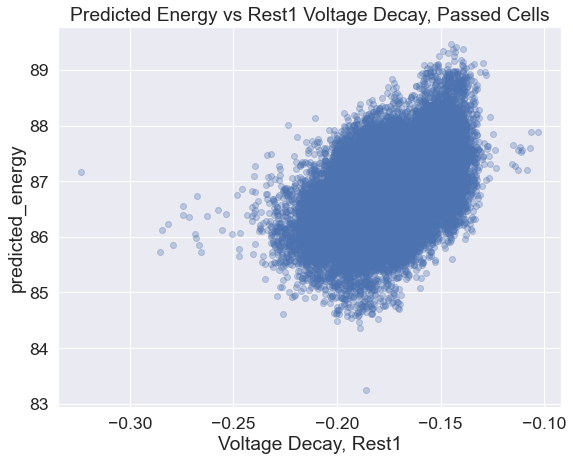

In [177]:
fig, ax = plt.subplots(figsize=(9, 7))
ax.scatter(df_out_rem.rest_1_voltage_decay,df_out_rem.predicted_energy, alpha=0.3)
ax.set_title("Predicted Energy vs Rest1 Voltage Decay, Passed Cells")
ax.set_xlabel("Voltage Decay, Rest1")
ax.set_ylabel("predicted_energy")

Text(0, 0.5, 'predicted_energy')

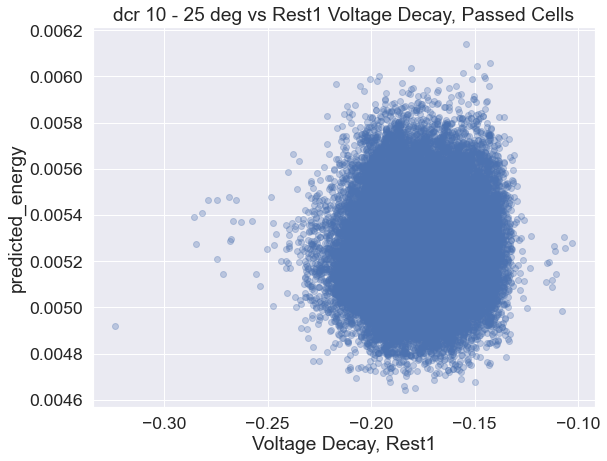

In [143]:
fig, ax = plt.subplots(figsize=(9, 7))
ax.scatter(df_out_rem.rest_1_voltage_decay,df_out_rem.dcr_10_25_deg_c_100_soc, alpha=0.3)
ax.set_title("dcr 10 - 25 deg vs Rest1 Voltage Decay, Passed Cells")
ax.set_xlabel("Voltage Decay, Rest1")
ax.set_ylabel("predicted_energy")

In [145]:
df_fail = df_out_rem[df_out_rem['status_rta3'] != "pass"]
df_fail

serial baseline  ocv_post_rta2  ocv_post_rta3  \
4      P1551370-10-D:STRR22152080FFW     B034       3.477966       3.476833   
56     P1551370-10-D:STRR22152080FGL     B034       3.475009       3.473949   
87     P1551370-10-D:STRR22152080F7F     B034       3.489534       3.488634   
88     P1551370-10-D:STRR22152080F77     B034       3.489516       3.488569   
95     P1551370-10-D:STRR22152080FNE     B034       3.466689       3.465361   
...                              ...      ...            ...            ...   
48651  P1551370-10-D:STRR221500G0DJ9     B034       2.631923       2.627458   
48682  P1551370-10-D:STRR221500G0DE0     B034       2.666780       2.661828   
48733  P1551370-10-D:STRR221500G0D9R     B034       2.650159       2.644711   
48765  P1551370-10-D:STRR221500G0DA3     B034       3.444913       3.444264   
48781  P1551370-10-D:STRR221500G0DA5     B034       2.672526       2.667376   

       dsoc_dt_rta3                               status_rta3  \
4         -0.000788  High Self-Discharge (>0.1%/day SOC Loss)   
56        -0.000737  High Self-Discharge (>0.1%/day SOC Loss)   
87        -0.000727  High Self-Discharge (>0.1%/day SOC Loss)   
88        -0.000765  High Self-Discharge (>0.1%/day SOC Loss)   
95        -0.000911  High Self-Discharge (>0.1%/day SOC Loss)   
...             ...                                       ...   
48651     -0.000152                                   low_ocv   
48682     -0.000169                                   low_ocv   
48733     -0.000185                                   low_ocv   
48765     -0.000430                                   low_ocv   
48781     -0.000175                                   low_ocv   

       rest_1_voltage_decay  rest_1_duration  rest_1_voltage_drop_per_hour  \
4                   -0.1685        12.599042                     -0.013374   
56                  -0.1755        12.599042                     -0.013930   
87                  -0.1835        12.205553                     -0.015034   
88                  -0.1885        12.205553                     -0.015444   
95                  -0.1655        12.205553                     -0.013559   
...                     ...              ...                           ...   
48651               -0.1930        12.232213                     -0.015778   
48682               -0.1695        12.383210                     -0.013688   
48733               -0.1800        12.259901                     -0.014682   
48765               -0.2260        12.259901                     -0.018434   
48781               -0.1840        12.259901                     -0.015008   

       rest_2_voltage_decay  rest_2_duration  rest_2_voltage_drop_per_hour  \
4                   -0.0475        24.323010                     -0.001953   
56                  -0.0480        24.323010                     -0.001973   
87                  -0.0505        24.223701                     -0.002085   
88                  -0.0505        24.223701                     -0.002085   
95                  -0.0420        24.223701                     -0.001734   
...                     ...              ...                           ...   
48651               -0.1670        24.304325                     -0.006871   
48682               -0.1155        24.297707                     -0.004754   
48733               -0.1545        24.197724                     -0.006385   
48765               -0.0575        24.197724                     -0.002376   
48781               -0.1450        24.197724                     -0.005992   

       dcr_10_25_deg_c_100_soc  dcr_10_25_deg_c_20p5_soc  \
4                     0.005658                  0.005324   
56                    0.005573                  0.005349   
87                    0.005420                  0.005039   
88                    0.005359                  0.005013   
95                    0.005481                  0.005042   
...                        ...                       ...   
48651 

Text(0, 0.5, 'predicted_energy')

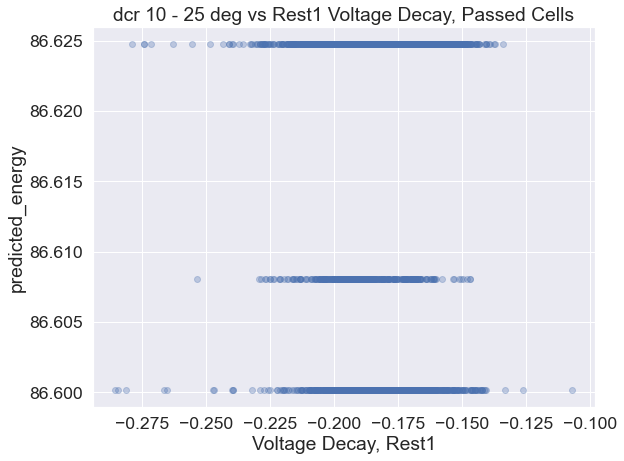

In [146]:
fig, ax = plt.subplots(figsize=(9, 7))
ax.scatter(df_fail.rest_1_voltage_decay,df_fail.lot_mean_energy, alpha=0.3)
ax.set_title("dcr 10 - 25 deg vs Rest1 Voltage Decay, Passed Cells")
ax.set_xlabel("Voltage Decay, Rest1")
ax.set_ylabel("predicted_energy")

Text(0, 0.5, 'predicted_energy')

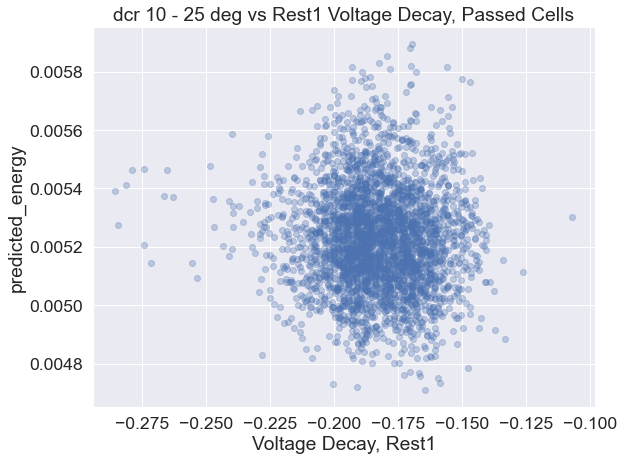

In [147]:
fig, ax = plt.subplots(figsize=(9, 7))
ax.scatter(df_fail.rest_1_voltage_decay,df_fail.dcr_10_25_deg_c_100_soc, alpha=0.3)
ax.set_title("dcr 10 - 25 deg vs Rest1 Voltage Decay, Passed Cells")
ax.set_xlabel("Voltage Decay, Rest1")
ax.set_ylabel("predicted_energy")

In [153]:
df_out_rem

serial baseline  ocv_post_rta2  ocv_post_rta3  \
0      P1551370-10-D:STRR22152080FSH     B034       3.481154       3.480364   
1      P1551370-10-D:STRR22152080FED     B034       3.480917       3.480169   
2      P1551370-10-D:STRR22152080CYW     B034       3.479401       3.478682   
3      P1551370-10-D:STRR22152080FG0     B034       3.487090       3.486235   
4      P1551370-10-D:STRR22152080FFW     B034       3.477966       3.476833   
...                              ...      ...            ...            ...   
48805  P1551370-10-D:STRR221500G0D7P     B034       3.475397       3.474571   
48806  P1551370-10-D:STRR221500G0D8R     B034       3.480309       3.479565   
48807  P1551370-10-D:STRR221500G0D8N     B034       3.475437       3.474627   
48808  P1551370-10-D:STRR221500G0D60     B034       3.476322       3.475572   
48809  P1551370-10-D:STRR221500G0D7V     B034       3.474824       3.474014   

       dsoc_dt_rta3                               status_rta3  \
0         -0.000549                                      pass   
1         -0.000520                                      pass   
2         -0.000500                                      pass   
3         -0.000683                                      pass   
4         -0.000788  High Self-Discharge (>0.1%/day SOC Loss)   
...             ...                                       ...   
48805     -0.000579                                      pass   
48806     -0.000521                                      pass   
48807     -0.000568                                      pass   
48808     -0.000526                                      pass   
48809     -0.000568                                      pass   

       rest_1_voltage_decay  rest_1_duration  rest_1_voltage_drop_per_hour  \
0                   -0.1965        12.599042                     -0.015596   
1                   -0.1675        12.599042                     -0.013295   
2                   -0.1605        12.599042                     -0.012739   
3                   -0.1865        12.599042                     -0.014803   
4                   -0.1685        12.599042                     -0.013374   
...                     ...              ...                           ...   
48805               -0.1960        12.171084                     -0.016104   
48806               -0.1735        12.171084                     -0.014255   
48807               -0.2130        12.171084                     -0.017501   
48808               -0.2075        12.171084                     -0.017049   
48809               -0.1865        12.171084                     -0.015323   

       rest_2_voltage_decay  rest_2_duration  rest_2_voltage_drop_per_hour  \
0                   -0.0540        24.323010                     -0.002220   
1                   -0.0410        24.323010                     -0.001686   
2                   -0.0400        24.323010                     -0.001645   
3                   -0.0540        24.323010                     -0.002220   
4                   -0.0475        24.323010                     -0.001953   
...                     ...              ...                           ...   
48805               -0.0570        24.216239                     -0.002354   
48806               -0.0465        24.216239                     -0.001920   
48807               -0.0505        24.216239                     -0.002085   
48808               -0.0435        24.216239                     -0.001796   
48809               -0.0485        24.216239                     -0.002003   

       dcr_10_25_deg_c_100_soc  dcr_10_25_deg_c_20p5_soc  \
0                     0.005425                  0.004750   
1                     0.005001                  0.004629   
2                     0.005500                  0.004971   
3                     0.005294                  0.004692   
4                     0.005658                  0.005324   
...                        ...                       ...   
48805 

In [152]:
df_pass

serial baseline  ocv_post_rta2  ocv_post_rta3  \
0      P1551370-10-D:STRR22152080FSH     B034       3.481154       3.480364   
1      P1551370-10-D:STRR22152080FED     B034       3.480917       3.480169   
2      P1551370-10-D:STRR22152080CYW     B034       3.479401       3.478682   
3      P1551370-10-D:STRR22152080FG0     B034       3.487090       3.486235   
5      P1551370-10-D:STRR22152080FFC     B034       3.477054       3.476291   
...                              ...      ...            ...            ...   
48805  P1551370-10-D:STRR221500G0D7P     B034       3.475397       3.474571   
48806  P1551370-10-D:STRR221500G0D8R     B034       3.480309       3.479565   
48807  P1551370-10-D:STRR221500G0D8N     B034       3.475437       3.474627   
48808  P1551370-10-D:STRR221500G0D60     B034       3.476322       3.475572   
48809  P1551370-10-D:STRR221500G0D7V     B034       3.474824       3.474014   

       dsoc_dt_rta3 status_rta3  rest_1_voltage_decay  rest_1_duration  \
0         -0.000549        pass               -0.1965        12.599042   
1         -0.000520        pass               -0.1675        12.599042   
2         -0.000500        pass               -0.1605        12.599042   
3         -0.000683        pass               -0.1865        12.599042   
5         -0.000531        pass               -0.1595        12.599042   
...             ...         ...                   ...              ...   
48805     -0.000579        pass               -0.1960        12.171084   
48806     -0.000521        pass               -0.1735        12.171084   
48807     -0.000568        pass               -0.2130        12.171084   
48808     -0.000526        pass               -0.2075        12.171084   
48809     -0.000568        pass               -0.1865        12.171084   

       rest_1_voltage_drop_per_hour  rest_2_voltage_decay  rest_2_duration  \
0                         -0.015596               -0.0540        24.323010   
1                         -0.013295               -0.0410        24.323010   
2                         -0.012739               -0.0400        24.323010   
3                         -0.014803               -0.0540        24.323010   
5                         -0.012660               -0.0455        24.323010   
...                             ...                   ...              ...   
48805                     -0.016104               -0.0570        24.216239   
48806                     -0.014255               -0.0465        24.216239   
48807                     -0.017501               -0.0505        24.216239   
48808                     -0.017049               -0.0435        24.216239   
48809                     -0.015323               -0.0485        24.216239   

       rest_2_voltage_drop_per_hour  dcr_10_25_deg_c_100_soc  \
0                         -0.002220                 0.005425   
1                         -0.001686                 0.005001   
2                         -0.001645                 0.005500   
3                         -0.002220                 0.005294   
5                         -0.001871                 0.005620   
...                             ...                      ...   
48805                     -0.002354                 0.005242   
48806                     -0.001920                 0.005474   
48807                     -0.002085                 0.005442   
48808                     -0.001796                 0.005243   
48809                     -0.002003                 0.005067   

       dcr_10_25_deg_c_20p5_soc  dcr_10_25_deg_c_50_soc  end_dcr_10_20p5_soc  \
0                      0.004750                0.003635             0.004623   
1                      0.004629                0.003455             0.004341   
2                      0.004971                0.003604             0.004722   
3                      0.004692                0.003661             0.004568   
5                      0.005171                0.003707             0.004993   
...   

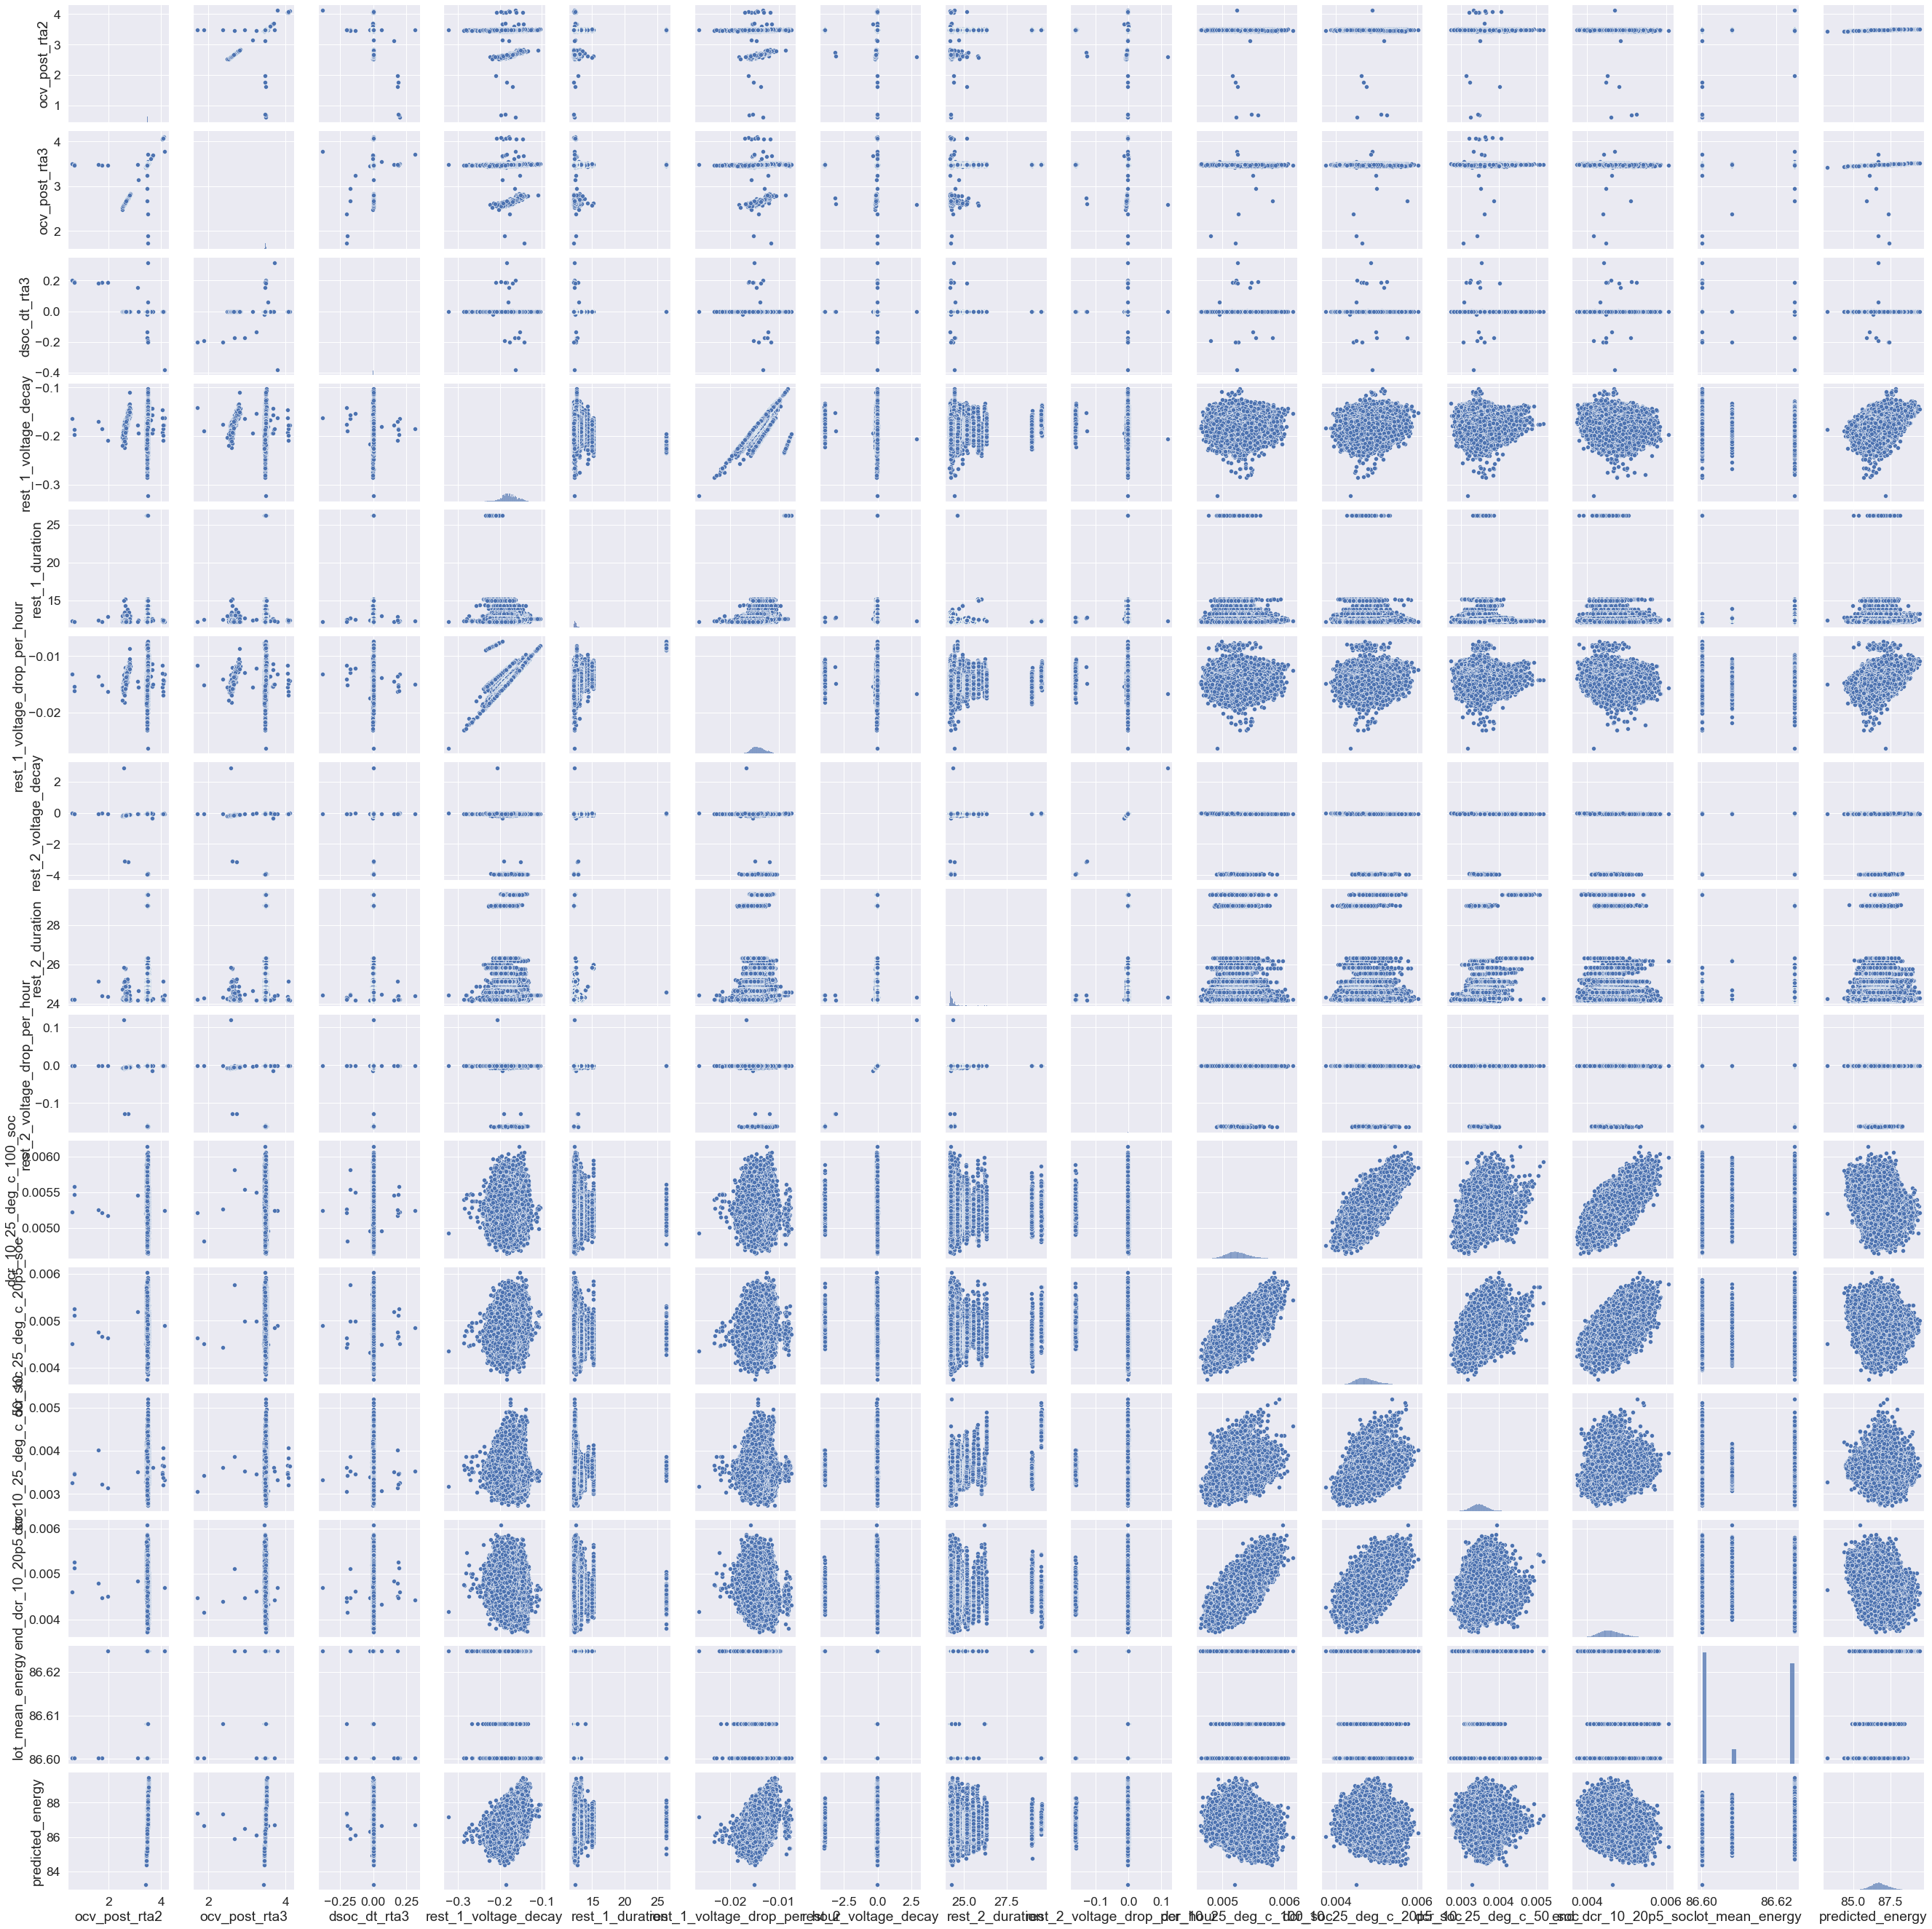

In [172]:
sns.pairplot(df_out_rem)

In [ ]:
df_out_rem[df_out_rem.rest_2_voltage_delay ]

In [125]:
df_full_plot = df_full[["ocv_post_rta2","ocv_post_rta3","dsoc_dt_rta3","rest_1_voltage_decay","status_rta3","predicted_energy","lot_mean_energy","dcr_10_25_deg_c_100_soc"]]

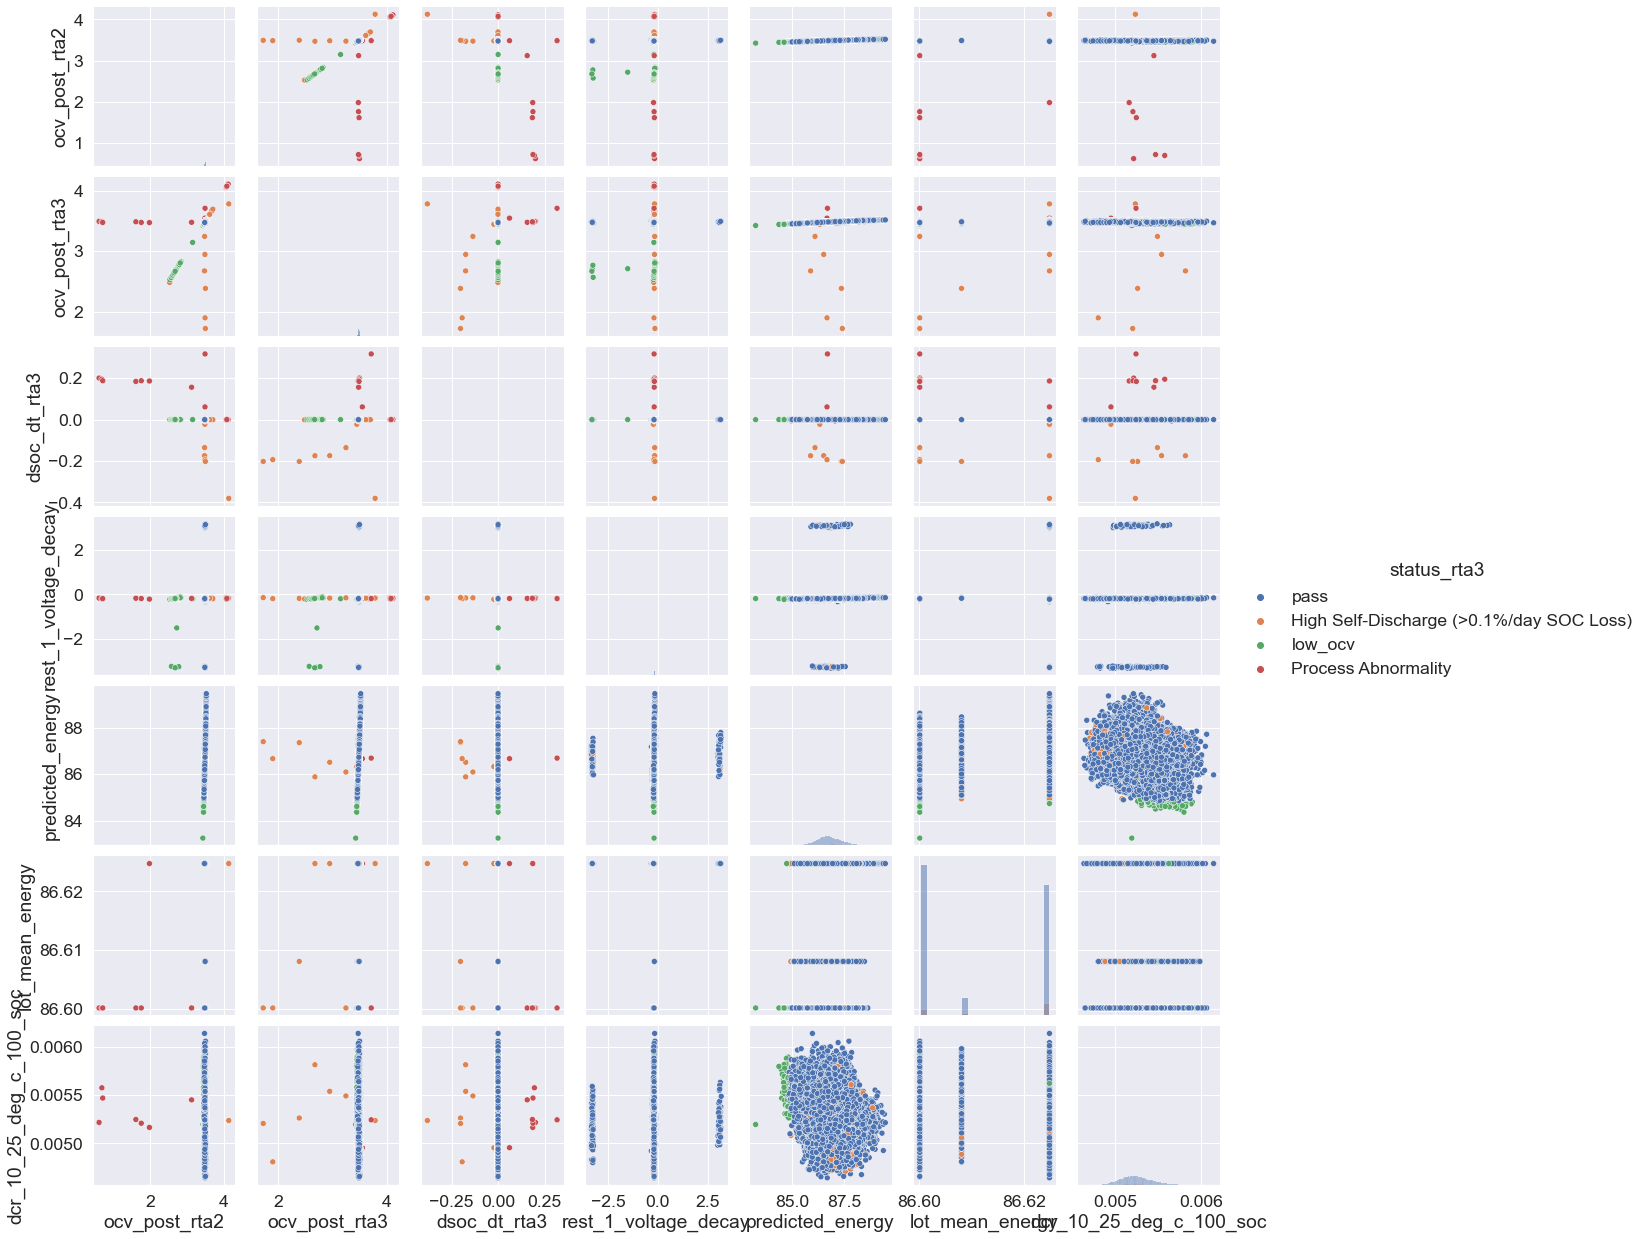

In [126]:
sns.pairplot(df_full_plot, hue="status_rta3", diag_kind="hist")

Text(0, 0.5, 'dcr 10 25deg 50soc')

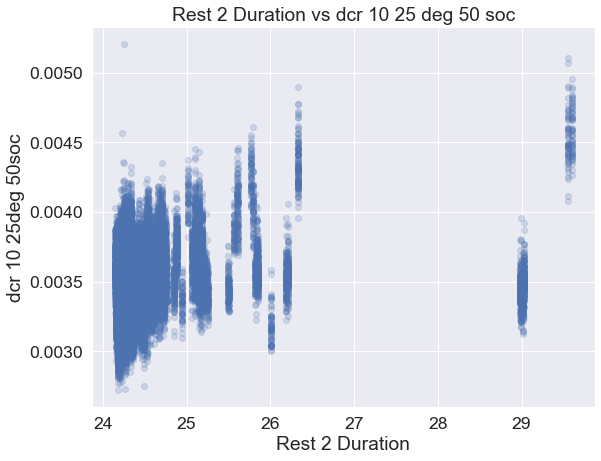

In [158]:
fig, ax = plt.subplots(figsize=(9, 7))
ax.scatter(df_out_rem.rest_2_duration,df_out_rem.dcr_10_25_deg_c_50_soc, alpha=0.2)
ax.set_title("Rest 2 Duration vs dcr 10 25 deg 50 soc")
ax.set_xlabel("Rest 2 Duration")
ax.set_ylabel("dcr 10 25deg 50soc")

Text(0, 0.5, 'dcr 10 25deg 50soc')

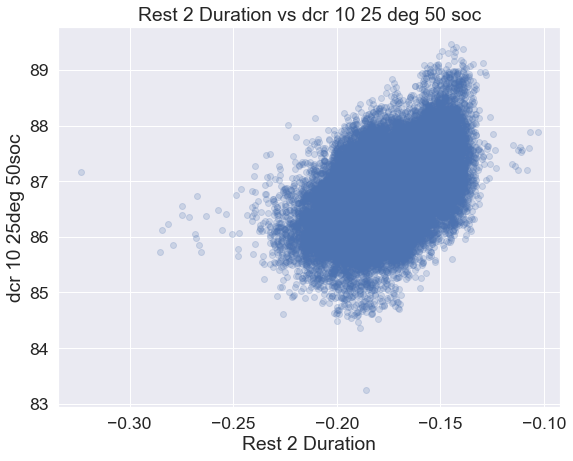

In [171]:
df_out_rem
fig, ax = plt.subplots(figsize=(9, 7))
ax.scatter(df_out_rem.rest_1_voltage_decay,df_out_rem.predicted_energy, alpha=0.2)
ax.set_title("Rest 2 Duration vs dcr 10 25 deg 50 soc")
ax.set_xlabel("Rest 2 Duration")
ax.set_ylabel("dcr 10 25deg 50soc")


In [227]:
result = stats.linregress(df_pass.dsoc_dt_rta3,df_pass.rest_1_voltage_decay)

In [228]:
print(result)

LinregressResult(slope=91.25044786211701, intercept=-0.12696168147822148, rvalue=0.04457333296387859, pvalue=2.253207856366081e-21, stderr=9.607956112359359, intercept_stderr=0.005266879252268898)


In [178]:
df_out_rem1 = df_out_rem[(df_out_rem.rest_2_voltage_decay > -1) & (df_out_rem.rest_2_voltage_decay < 1)]
df_out_rem1


serial baseline  ocv_post_rta2  ocv_post_rta3  \
0      P1551370-10-D:STRR22152080FSH     B034       3.481154       3.480364   
1      P1551370-10-D:STRR22152080FED     B034       3.480917       3.480169   
2      P1551370-10-D:STRR22152080CYW     B034       3.479401       3.478682   
3      P1551370-10-D:STRR22152080FG0     B034       3.487090       3.486235   
4      P1551370-10-D:STRR22152080FFW     B034       3.477966       3.476833   
...                              ...      ...            ...            ...   
48805  P1551370-10-D:STRR221500G0D7P     B034       3.475397       3.474571   
48806  P1551370-10-D:STRR221500G0D8R     B034       3.480309       3.479565   
48807  P1551370-10-D:STRR221500G0D8N     B034       3.475437       3.474627   
48808  P1551370-10-D:STRR221500G0D60     B034       3.476322       3.475572   
48809  P1551370-10-D:STRR221500G0D7V     B034       3.474824       3.474014   

       dsoc_dt_rta3                               status_rta3  \
0         -0.000549                                      pass   
1         -0.000520                                      pass   
2         -0.000500                                      pass   
3         -0.000683                                      pass   
4         -0.000788  High Self-Discharge (>0.1%/day SOC Loss)   
...             ...                                       ...   
48805     -0.000579                                      pass   
48806     -0.000521                                      pass   
48807     -0.000568                                      pass   
48808     -0.000526                                      pass   
48809     -0.000568                                      pass   

       rest_1_voltage_decay  rest_1_duration  rest_1_voltage_drop_per_hour  \
0                   -0.1965        12.599042                     -0.015596   
1                   -0.1675        12.599042                     -0.013295   
2                   -0.1605        12.599042                     -0.012739   
3                   -0.1865        12.599042                     -0.014803   
4                   -0.1685        12.599042                     -0.013374   
...                     ...              ...                           ...   
48805               -0.1960        12.171084                     -0.016104   
48806               -0.1735        12.171084                     -0.014255   
48807               -0.2130        12.171084                     -0.017501   
48808               -0.2075        12.171084                     -0.017049   
48809               -0.1865        12.171084                     -0.015323   

       rest_2_voltage_decay  rest_2_duration  rest_2_voltage_drop_per_hour  \
0                   -0.0540        24.323010                     -0.002220   
1                   -0.0410        24.323010                     -0.001686   
2                   -0.0400        24.323010                     -0.001645   
3                   -0.0540        24.323010                     -0.002220   
4                   -0.0475        24.323010                     -0.001953   
...                     ...              ...                           ...   
48805               -0.0570        24.216239                     -0.002354   
48806               -0.0465        24.216239                     -0.001920   
48807               -0.0505        24.216239                     -0.002085   
48808               -0.0435        24.216239                     -0.001796   
48809               -0.0485        24.216239                     -0.002003   

       dcr_10_25_deg_c_100_soc  dcr_10_25_deg_c_20p5_soc  \
0                     0.005425                  0.004750   
1                     0.005001                  0.004629   
2                     0.005500                  0.004971   
3                     0.005294                  0.004692   
4                     0.005658                  0.005324   
...                        ...                       ...   
48805 

Text(0, 0.5, 'dcr 10 25deg 50soc')

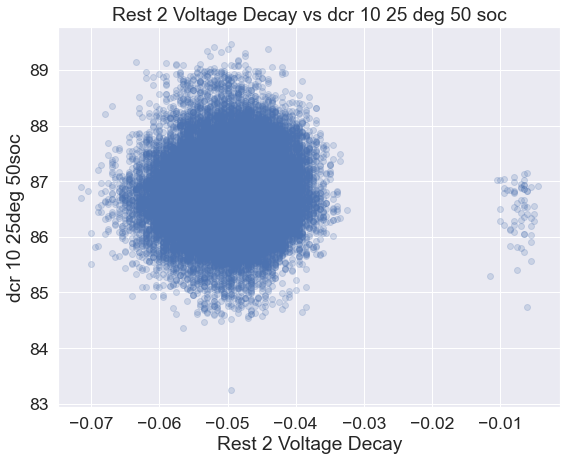

In [182]:
df_out_rem
fig, ax = plt.subplots(figsize=(9, 7))
ax.scatter(df_out_rem1.rest_2_voltage_decay,df_out_rem1.predicted_energy, alpha=0.2)
ax.set_title("Rest 2 Voltage Decay vs dcr 10 25 deg 50 soc")
ax.set_xlabel("Rest 2 Voltage Decay")
ax.set_ylabel("dcr 10 25deg 50soc")


In [134]:
df_full_filter = df_out_rem1[["status_rta3","rest_1_voltage_decay","rest_1_duration","rest_2_voltage_decay","dcr_10_25_deg_c_100_soc","lot_mean_energy","predicted_energy"]]

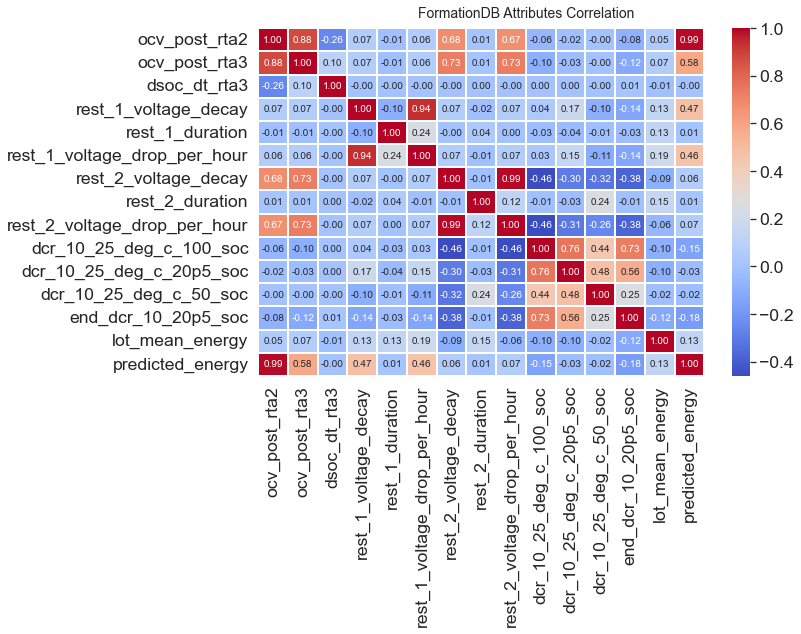

In [189]:
f, ax = plt.subplots(figsize=(10, 6))
corr = df_out_rem1.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('FormationDB Attributes Correlation ', fontsize=14)

In [ ]:
mask = ~np.isnan(df_out_rem1.rest_1_voltage_decay) & ~np.isnan(df_out_rem1.predicted_energy)
slope, intercept, r_value, p_value, std_err = stats.linregress(df_out_rem1.rest_1_voltage_decay[mask], df_out_rem1.predicted_energy[mask])
r_value


In [238]:
mask = ~np.isnan(df_out_rem1.rest_1_voltage_decay) & ~np.isnan(df_out_rem1.predicted_energy)
slope, intercept, r_value, p_value, std_err = stats.linregress(df_out_rem1.rest_1_voltage_decay[mask], df_out_rem1.predicted_energy[mask])
r_value


0.4748860930528685

Text(0, 0.5, 'Predicted Energy')

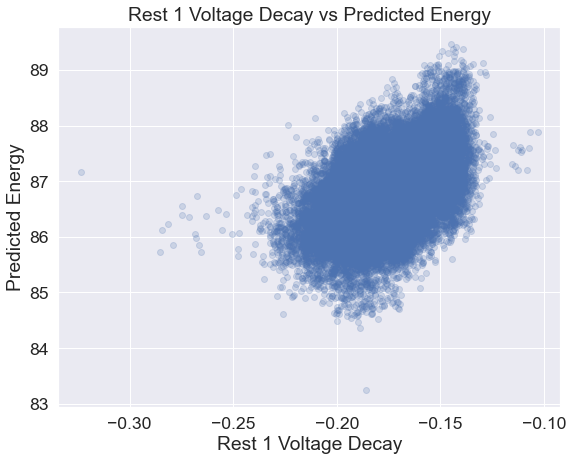

In [201]:
fig, ax = plt.subplots(figsize=(9, 7))
ax.scatter(df_out_rem1.rest_1_voltage_decay,df_out_rem1.predicted_energy, alpha=0.2)
ax.set_title("Rest 1 Voltage Decay vs Predicted Energy")
ax.set_xlabel("Rest 1 Voltage Decay")
ax.set_ylabel("Predicted Energy")


Text(0, 0.5, 'Predicted Energy')

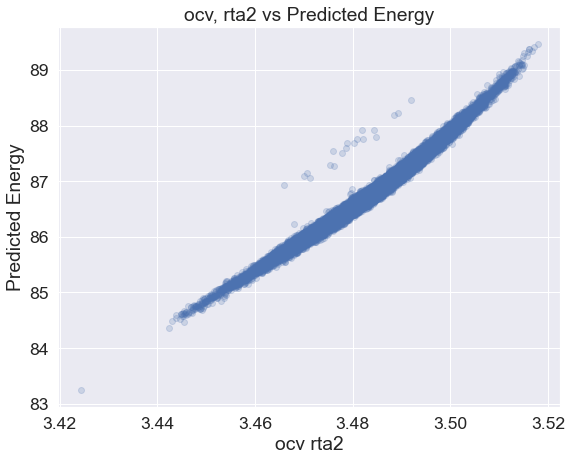

In [204]:
fig, ax = plt.subplots(figsize=(9, 7))
ax.scatter(df_out_rem1.ocv_post_rta2,df_out_rem1.predicted_energy, alpha=0.2)
ax.set_title("ocv, rta2 vs Predicted Energy")
ax.set_xlabel("ocv rta2")
ax.set_ylabel("Predicted Energy")


Text(0, 0.5, 'Predicted Energy')

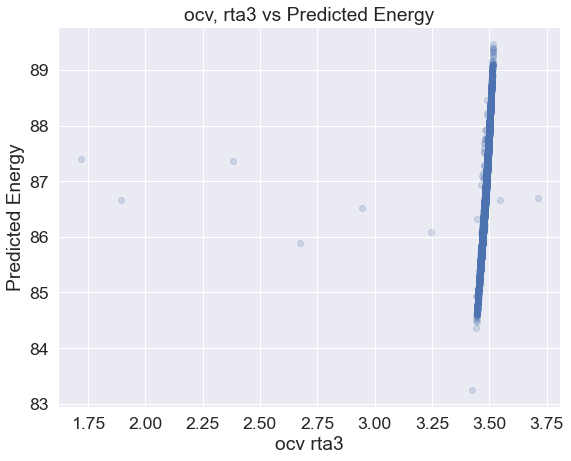

In [203]:
fig, ax = plt.subplots(figsize=(9, 7))
ax.scatter(df_out_rem1.ocv_post_rta3,df_out_rem1.predicted_energy, alpha=0.2)
ax.set_title("ocv, rta3 vs Predicted Energy")
ax.set_xlabel("ocv rta3")
ax.set_ylabel("Predicted Energy")


Text(0, 0.5, 'Predicted Energy')

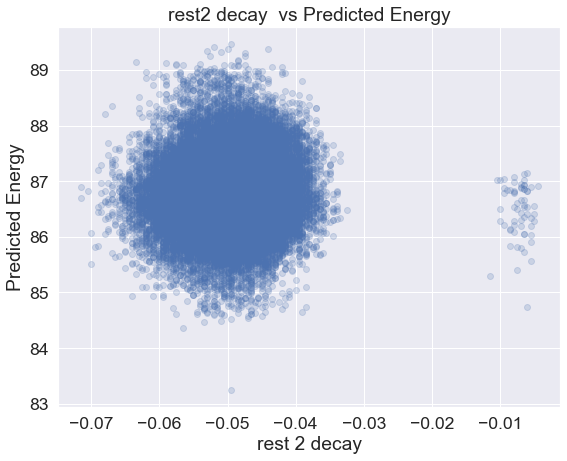

In [206]:
fig, ax = plt.subplots(figsize=(9, 7))
ax.scatter(df_out_rem1.rest_2_voltage_decay,df_out_rem1.predicted_energy, alpha=0.2)
ax.set_title("rest2 decay  vs Predicted Energy")
ax.set_xlabel("rest 2 decay")
ax.set_ylabel("Predicted Energy")


Text(0, 0.5, 'ocv rta3')

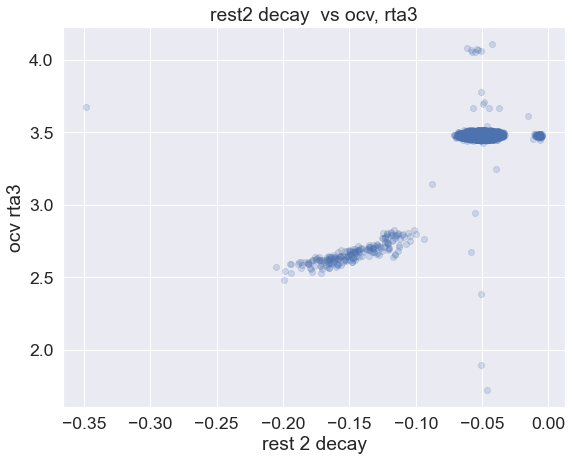

In [208]:
fig, ax = plt.subplots(figsize=(9, 7))
ax.scatter(df_out_rem1.rest_2_voltage_decay,df_out_rem1.ocv_post_rta3, alpha=0.2)
ax.set_title("rest2 decay  vs ocv, rta3")
ax.set_xlabel("rest 2 decay")
ax.set_ylabel("ocv rta3")


Text(0, 0.5, 'ocv rta2')

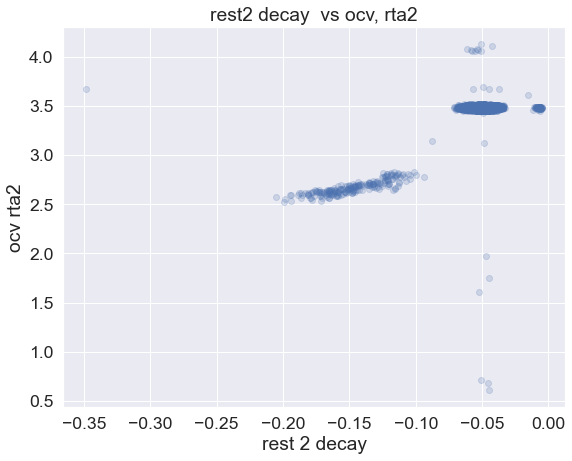

In [209]:
fig, ax = plt.subplots(figsize=(9, 7))
ax.scatter(df_out_rem1.rest_2_voltage_decay,df_out_rem1.ocv_post_rta2, alpha=0.2)
ax.set_title("rest2 decay  vs ocv, rta2")
ax.set_xlabel("rest 2 decay")
ax.set_ylabel("ocv rta2")


Text(0, 0.5, 'ocv rta2')

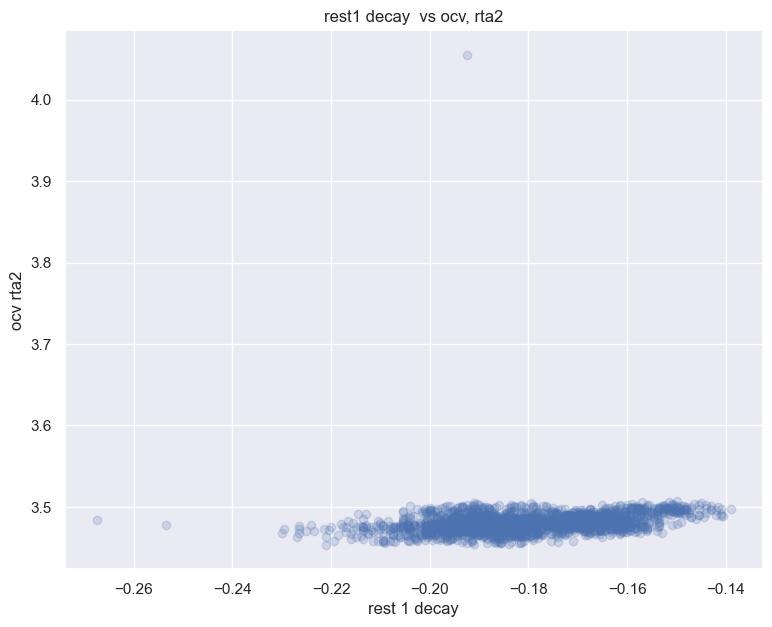

In [336]:
fig, ax = plt.subplots(figsize=(9, 7))
ax.scatter(df_full_new1.rest_1_voltage_decay,df_full_new1.ocv_post_rta2, alpha=0.2)
ax.set_title("rest1 decay  vs ocv, rta2")
ax.set_xlabel("rest 1 decay")
ax.set_ylabel("ocv rta2")
#filter cell qith ocr below 3.4


In [212]:
df_out_rem1.groupby('status_rta3', as_index=False, sort=False).mean()

status_rta3  ocv_post_rta2  ocv_post_rta3  \
0                                      pass       3.483677       3.482946   
1  High Self-Discharge (>0.1%/day SOC Loss)       3.484377       3.481208   
2                                   low_ocv       2.893391       2.889419   
3                       Process Abnormality       3.080495       3.697583   

   dsoc_dt_rta3  rest_1_voltage_decay  rest_1_duration  \
0     -0.000542             -0.176681        12.484435   
1     -0.001313             -0.182898        12.506399   
2     -0.000237             -0.178674        12.515801   
3      0.072722             -0.183348        12.445831   

   rest_1_voltage_drop_per_hour  rest_2_voltage_decay  rest_2_duration  \
0                     -0.014169             -0.049569        24.452028   
1                     -0.014634             -0.050920        24.442429   
2                     -0.014286             -0.118754        24.365096   
3                     -0.014731             -0.063587        24.367285   

   rest_2_voltage_drop_per_hour  dcr_10_25_deg_c_100_soc  \
0                     -0.002028                 0.005248   
1                     -0.002084                 0.005217   
2                     -0.004873                 0.005572   
3                     -0.002613                 0.005254   

   dcr_10_25_deg_c_20p5_soc  dcr_10_25_deg_c_50_soc  end_dcr_10_20p5_soc  \
0                  0.004760                0.003488             0.004603   
1                  0.004688                0.003484             0.004588   
2                  0.005230                0.003628             0.005185   
3                  0.004822                0.003478             0.004616   

   lot_mean_energy  predicted_energy  
0        86.611301         86.782523  
1        86.615501         86.802128  
2        86.600740         84.709347  
3        86.609621         86.320519

### Combining with efill

In [213]:
comp = db.TeslaDB("clickhouse_rr")

In [214]:
query = f"""
select * from cellmfg.efill_task_results
where component_id in %(serials)s
"""

In [215]:
query = f"""
select * from cellmfg.efill_task_results
where component_id in %(serials)s
"""

df_efill_test = comp.fetch(query, params={"serials": serials[:10]}) # we have to chunk this query up, can't pull all the data at once.

df_efill = pd.DataFrame(columns=df_efill_test.columns)

chunk_size = 1000
for i in range(len(serials)//chunk_size + 1)[:2]:
    serials_chunk = serials[i*chunk_size:(i+1)*chunk_size]
    df_chunk = comp.fetch(query, params={"serials": serials_chunk})
    df_efill = pd.concat([df_efill, df_chunk])

print(len(df_efill))
df_efill.head()

1983


id                   component_id  \
0  ca1e4a21-4555-4a9e-8fdc-2ffdfa439325  P1551370-10-D:STRR22152080B4D   
1  c06ff54f-5f85-44fc-8847-865dca238006  P1551370-10-D:STRR22152080B7W   
2  cfa456d6-33bc-40bc-b9d5-23c3dffe9072  P1551370-10-D:STRR22152080B7Z   
3  503dbb06-cc11-4223-b906-cd3dd1af5e85  P1551370-10-D:STRR22152080BG3   
4  9129af93-5860-4709-bc7b-c51560a943fb  P1551370-10-D:STRR22152080BGP   

       step_name step_completed location_name step_start_observed_at  \
0  100_cm2_49000              0  cm2_49000_03    2022-06-01 12:02:29   
1  100_cm2_49000              0  cm2_49000_02    2022-06-01 11:14:22   
2  100_cm2_49000              0  cm2_49000_02    2022-06-01 11:14:22   
3  100_cm2_49000              0  cm2_49000_04    2022-06-01 09:17:38   
4  100_cm2_49000              0  cm2_49000_04    2022-06-01 09:17:37   

  step_complete_observed_at written_to_kafka_at ion_event_dt       boat_id  \
0       2022-06-01 12:08:04 2022-06-01 12:08:15     20220601  TRR75A000228   
1       2022-06-01 11:20:03 2022-06-01 11:20:13     20220601  TRR75A000261   
2       2022-06-01 11:20:03 2022-06-01 11:20:13     20220601  TRR75A000005   
3       2022-06-01 09:27:49 2022-06-01 09:28:00     20220601  TRR75A000243   
4       2022-06-01 09:27:49 2022-06-01 09:27:59     20220601  TRR75A000243   

   boats_in_dial cell_boat_position efill_leak_test_okay  efill_reject_code  \
0            9.0                  9                 None                0.0   
1            6.0                  8                 None                0.0   
2            6.0                 10                 None                0.0   
3            6.0                 12                 None                0.0   
4            6.0                  5                 None                0.0   

      efill_timestamp      electrolyte_previous_lot  enabled_heads fill_head  \
0 2022-06-01 12:05:20  P1614626-00-A:STT4161790100B            9.0         2   
1 2022-06-01 11:16:16  P1614626-00-A:STT4161790100B           11.0        12   
2 2022-06-01 11:16:16  P1614626-00-A:STT4161790100B           11.0        12   
3 2022-06-01 09:18:56  P1614626-00-A:STT4161790100B            9.0        10   
4 2022-06-01 09:18:56  P1614626-00-A:STT4161790100B            9.0        10   

   num_gun_feeds plunge_count plunge_time preweigh_lower_spec_okay  \
0           83.0         None        None                     None   
1          354.0         None        None                     None   
2          359.0         None        None                     None   
3         1677.0         None        None                     None   
4           56.0         None        None                     None   

   rivet_break_distance  rivet_break_force  rivet_gun_number rivet_okay  \
0                  5.53             3255.0               3.0       None   
1                  3.42             2878.0               3.0       None   
2                  3.37             2780.0               4.0       None   
3                  3.46             2944.0               4.0       None   
4                  5.48             3093.0               2.0       None   

        rivet_previous_lot  weight_delta_efill  weight_post_efill  \
0  P1637680-00-A:1T1639691               46.84             357.83   
1  P1637689-00-A:1T1589984               46.73             357.60   
2  P1637689-00-A:1T1589984               46.71             356.57   
3  P1637680-00-A:1T1673073               46.99             356.29   
4  P1637680-00-A:1T1673073               46.96             355.74   

   weight_pre_efill process_name process_variant_name  
0            311.00     assembly                 base  
1            310.86     assembly                 base  
2            309.86     assembly                 base  
3            309.30     assembly                 base  
4            308.77     assembly                 base

In [219]:
df_efill_filtered = df_efill.rename(columns={"component_id":"serial"})


In [221]:
df_efill_filtered = df_efill_filtered[["serial","location_name","boat_id","boats_in_dial","cell_boat_position","rivet_break_distance","rivet_break_force","rivet_gun_number","rivet_previous_lot","weight_delta_efill","weight_pre_efill","weight_post_efill"]]
df_full_new = df_efill_filtered.merge(df_out_rem1, on="serial")

In [222]:
df_full_new.head()

serial location_name       boat_id  boats_in_dial  \
0  P1551370-10-D:STRR22152080B4D  cm2_49000_03  TRR75A000228            9.0   
1  P1551370-10-D:STRR22152080B7W  cm2_49000_02  TRR75A000261            6.0   
2  P1551370-10-D:STRR22152080B7Z  cm2_49000_02  TRR75A000005            6.0   
3  P1551370-10-D:STRR22152080BG3  cm2_49000_04  TRR75A000243            6.0   
4  P1551370-10-D:STRR22152080BGP  cm2_49000_04  TRR75A000243            6.0   

  cell_boat_position  rivet_break_distance  rivet_break_force  \
0                  9                  5.53             3255.0   
1                  8                  3.42             2878.0   
2                 10                  3.37             2780.0   
3                 12                  3.46             2944.0   
4                  5                  5.48             3093.0   

   rivet_gun_number       rivet_previous_lot  weight_delta_efill  \
0               3.0  P1637680-00-A:1T1639691               46.84   
1               3.0  P1637689-00-A:1T1589984               46.73   
2               4.0  P1637689-00-A:1T1589984               46.71   
3               4.0  P1637680-00-A:1T1673073               46.99   
4               2.0  P1637680-00-A:1T1673073               46.96   

   weight_pre_efill  weight_post_efill baseline  ocv_post_rta2  ocv_post_rta3  \
0            311.00             357.83     B034       3.484424       3.483402   
1            310.86             357.60     B034       3.479877       3.478906   
2            309.86             356.57     B034       3.482665       3.481863   
3            309.30             356.29     B034       3.488856       3.487830   
4            308.77             355.74     B034       3.476050       3.475101   

   dsoc_dt_rta3                               status_rta3  \
0     -0.000726  High Self-Discharge (>0.1%/day SOC Loss)   
1     -0.000681                                      pass   
2     -0.000563                                      pass   
3     -0.000825  High Self-Discharge (>0.1%/day SOC Loss)   
4     -0.000665                                      pass   

   rest_1_voltage_decay  rest_1_duration  rest_1_voltage_drop_per_hour  \
0               -0.1920        12.195287                     -0.015744   
1               -0.2100        12.638248                     -0.016616   
2               -0.1935        12.638248                     -0.015311   
3               -0.1795        12.625667                     -0.014217   
4               -0.1535        12.625667                     -0.012158   

   rest_2_voltage_decay  rest_2_duration  rest_2_voltage_drop_per_hour  \
0               -0.0430        24.563265                     -0.001751   
1               -0.0560        24.232674                     -0.002311   
2               -0.0465        24.232674                     -0.001919   
3               -0.0465        24.232662                     -0.001919   
4               -0.0450        24.232662                     -0.001857   

   dcr_10_25_deg_c_100_soc  dcr_10_25_deg_c_20p5_soc  dcr_10_25_deg_c_50_soc  \
0                 0.005051                  0.004533                0.003569   
1                 0.005142                  0.004531                0.003578   
2                 0.005193                  0.004372                0.003517   
3                 0.005207                  0.004465                0.003350   
4                 0.005119                  0.004565                0.003250   

   end_dcr_10_20p5_soc  lot_mean_energy  predicted_energy  
0             0.004331        86.608082         86.740292  
1             0.004886        86.608082         86.546914  
2             0.004492        86.608082         86.665078  
3             0.004780        86.608082         87.084307  
4             0.004690        86.608082         86.412865

In [296]:
df_full_efill = df_full_new.drop(["boats_in_dial","rivet_break_distance","rivet_break_force","lot_mean_energy","rivet_gun_number","rest_1_voltage_drop_per_hour","rest_2_voltage_drop_per_hour"],axis=1)

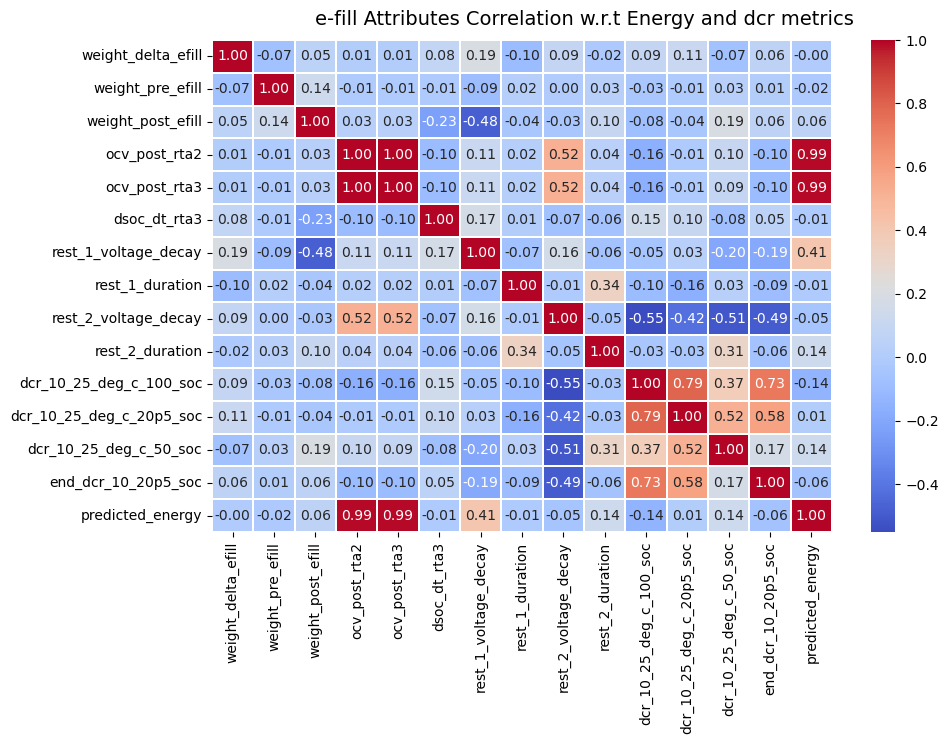

In [297]:
f, ax = plt.subplots(figsize=(10, 6))
corr = df_full_efill.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('e-fill Attributes Correlation w.r.t Energy and dcr metrics ', fontsize=14)

Intercept, Rvalue, Pvalue, Std Error. r-squared Value
0.010095772387023067 -1.0547365264513868 0.40804512565674517 3.1369212360081206e-80 0.0005081482959096249 0.16650082457222895


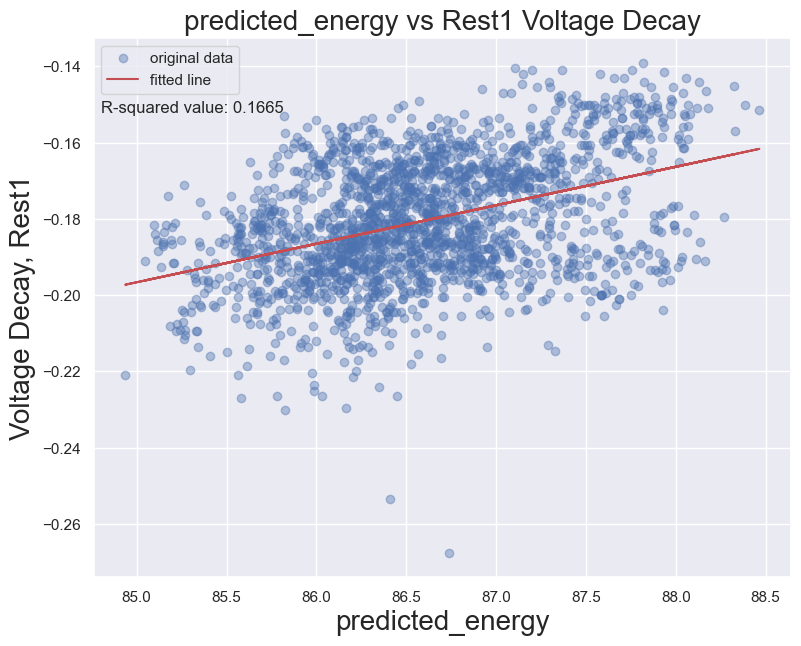

In [364]:
mask = ~np.isnan(df_full_efill.predicted_energy) & ~np.isnan(df_full_efill.rest_1_voltage_decay)
slope, intercept, r_value, p_value, std_err = stats.linregress(df_full_efill.predicted_energy[mask], df_full_efill.rest_1_voltage_decay[mask])

# result = stats.linregress(df_full_efill.predicted_energy,df_full_efill.rest_1_voltage_decay)

print("Intercept, Rvalue, Pvalue, Std Error. r-squared Value")
print(slope,intercept,r_value, p_value, std_err, r_value**2)


fig, ax = plt.subplots(figsize=(9, 7))
ax.plot(df_full_efill.predicted_energy, df_full_efill.rest_1_voltage_decay, 'o', label='original data', alpha=0.4)
ax.plot(df_full_efill.predicted_energy, intercept + slope*df_full_efill.predicted_energy, 'r', label='fitted line')
ax.set_title("predicted_energy vs Rest1 Voltage Decay",fontsize=20)
ax.set_ylabel("Voltage Decay, Rest1",fontsize=20)
ax.set_xlabel("predicted_energy",fontsize=20)
ax.text(84.8, -0.152, 'R-squared value: 0.1665')


ax.legend()

Intercept, Rvalue, Pvalue, Std Error. r-squared Value
0.010095772387023067 -1.0547365264513868 0.40804512565674517 3.1369212360081206e-80 0.0005081482959096249 0.16650082457222895


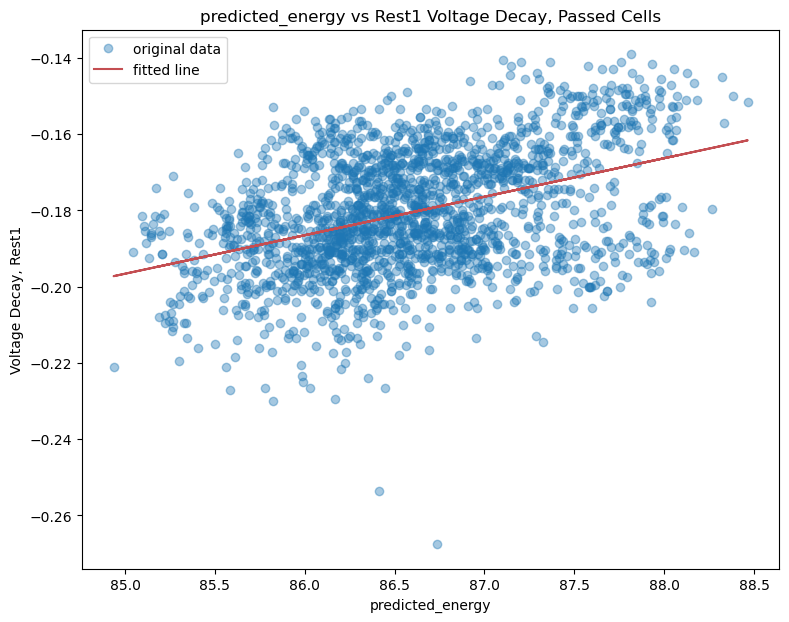

In [320]:
mask = ~np.isnan(df_full_new1.predicted_energy) & ~np.isnan(df_full_new1.rest_1_voltage_decay)
result = stats.linregress(df_full_new1.predicted_energy[mask], df_full_new1.rest_1_voltage_decay[mask])

# result = stats.linregress(df_full_efill.predicted_energy,df_full_efill.rest_1_voltage_decay)

print("Intercept, Rvalue, Pvalue, Std Error. r-squared Value")
print(slope,intercept,r_value, p_value, std_err, r_value**2)

fig, ax = plt.subplots(figsize=(9, 7))
ax.plot(df_full_new1.predicted_energy, df_full_new1.rest_1_voltage_decay, 'o', label='original data', alpha=0.4)
ax.plot(df_full_new1.predicted_energy, result.intercept + result.slope*df_full_new1.predicted_energy, 'r', label='fitted line')
ax.set_title("predicted_energy vs Rest1 Voltage Decay, Passed Cells")
ax.set_ylabel("Voltage Decay, Rest1")
ax.set_xlabel("predicted_energy")
ax.legend()

In [354]:
df_full_efill.columns

df_efill = df_full_efill[[]]

Index(['serial', 'location_name', 'boat_id', 'cell_boat_position',
       'rivet_previous_lot', 'weight_delta_efill', 'weight_pre_efill',
       'weight_post_efill', 'baseline', 'ocv_post_rta2', 'ocv_post_rta3',
       'dsoc_dt_rta3', 'status_rta3', 'rest_1_voltage_decay',
       'rest_1_duration', 'rest_2_voltage_decay', 'rest_2_duration',
       'dcr_10_25_deg_c_100_soc', 'dcr_10_25_deg_c_20p5_soc',
       'dcr_10_25_deg_c_50_soc', 'end_dcr_10_20p5_soc', 'predicted_energy'],
      dtype='object')

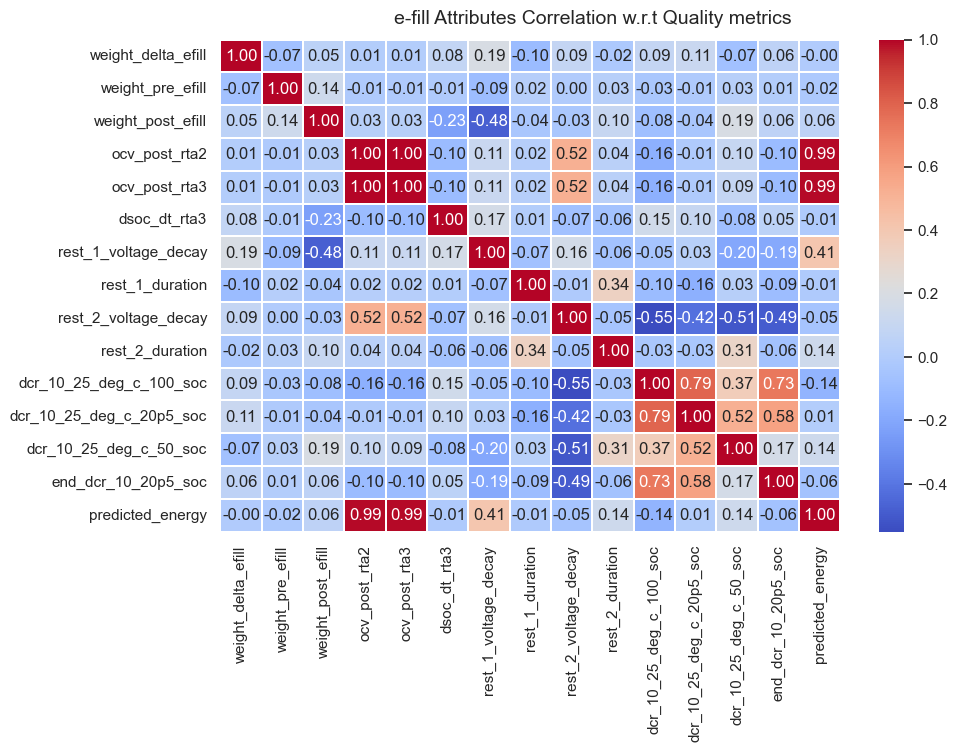

In [355]:
f, ax = plt.subplots(figsize=(10, 6))
corr = df_full_efill.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('e-fill Attributes Correlation w.r.t Quality metrics ', fontsize=14)

Intercept, Rvalue, Pvalue, Std Error. r-squared Value
0.09261754277659189 -0.37222721176974116 0.5233706675044604 8.140588037785462e-140 0.003388788449521206 0.2739168556040644


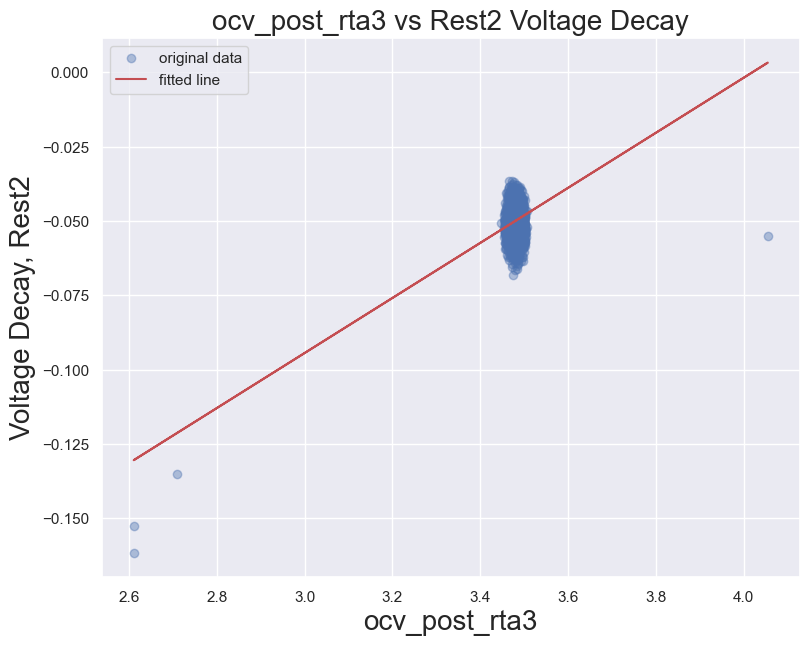

In [365]:
mask = ~np.isnan(df_full_efill.ocv_post_rta3) & ~np.isnan(df_full_efill.rest_2_voltage_decay)
slope, intercept, r_value, p_value, std_err = stats.linregress(df_full_efill.ocv_post_rta3[mask], df_full_efill.rest_2_voltage_decay[mask])

# result = stats.linregress(df_full_efill.predicted_energy,df_full_efill.rest_1_voltage_decay)

print("Intercept, Rvalue, Pvalue, Std Error. r-squared Value")
print(slope,intercept,r_value, p_value, std_err, r_value**2)


fig, ax = plt.subplots(figsize=(9, 7))
ax.plot(df_full_efill.ocv_post_rta3, df_full_efill.rest_2_voltage_decay, 'o', label='original data', alpha=0.4)
ax.plot(df_full_efill.ocv_post_rta3, intercept + slope*df_full_efill.ocv_post_rta3, 'r', label='fitted line')
ax.set_title("ocv_post_rta3 vs Rest2 Voltage Decay",fontsize=20)
ax.set_ylabel("Voltage Decay, Rest2",fontsize=20)
ax.set_xlabel("ocv_post_rta3",fontsize=20)
# ax.text(84.8, -0.152, 'R-squared value: 0.1665')


ax.legend()

Intercept, Rvalue, Pvalue, Std Error. r-squared Value
0.010095772387023067 -1.0547365264513868 0.40804512565674517 3.1369212360081206e-80 0.0005081482959096249 0.16650082457222895


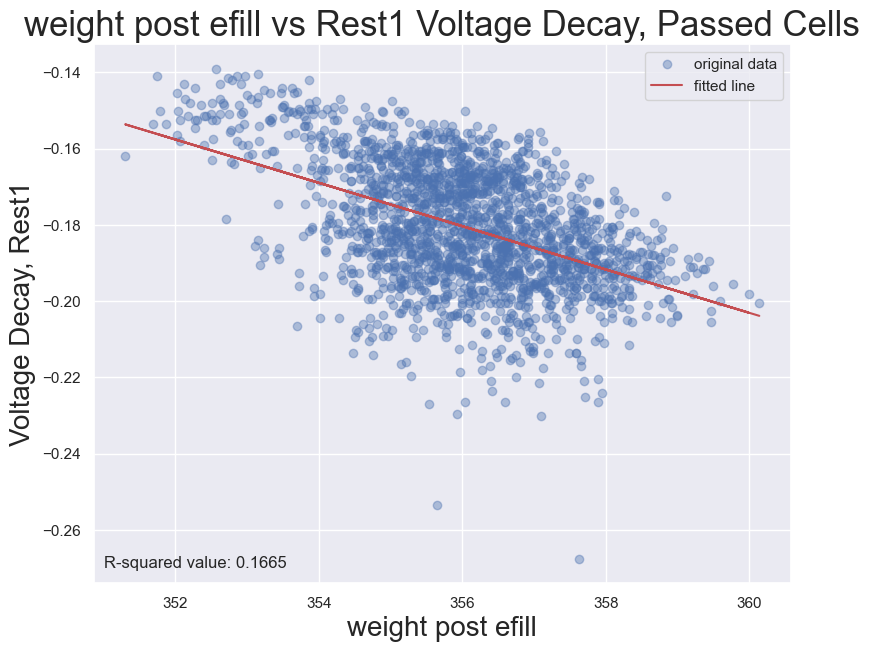

In [363]:
mask = ~np.isnan(df_full_efill.weight_post_efill) & ~np.isnan(df_full_efill.rest_1_voltage_decay)
result = stats.linregress(df_full_efill.weight_post_efill[mask], df_full_efill.rest_1_voltage_decay[mask])

# result = stats.linregress(df_full_efill.predicted_energy,df_full_efill.rest_1_voltage_decay)

print("Intercept, Rvalue, Pvalue, Std Error. r-squared Value")
print(slope,intercept,r_value, p_value, std_err, r_value**2)

fig, ax = plt.subplots(figsize=(9, 7))
ax.plot(df_full_efill.weight_post_efill, df_full_efill.rest_1_voltage_decay, 'o', label='original data', alpha=0.4)
ax.plot(df_full_efill.weight_post_efill, result.intercept + result.slope*df_full_efill.weight_post_efill, 'r', label='fitted line')
ax.set_title("weight post efill vs Rest1 Voltage Decay, Passed Cells", fontsize = 25)
ax.set_ylabel("Voltage Decay, Rest1", fontsize = 20)
ax.set_xlabel("weight post efill",fontsize = 20)
ax.text(351, -0.270, 'R-squared value: 0.1665')
ax.legend()

Text(0, 0.5, 'weight post efill')

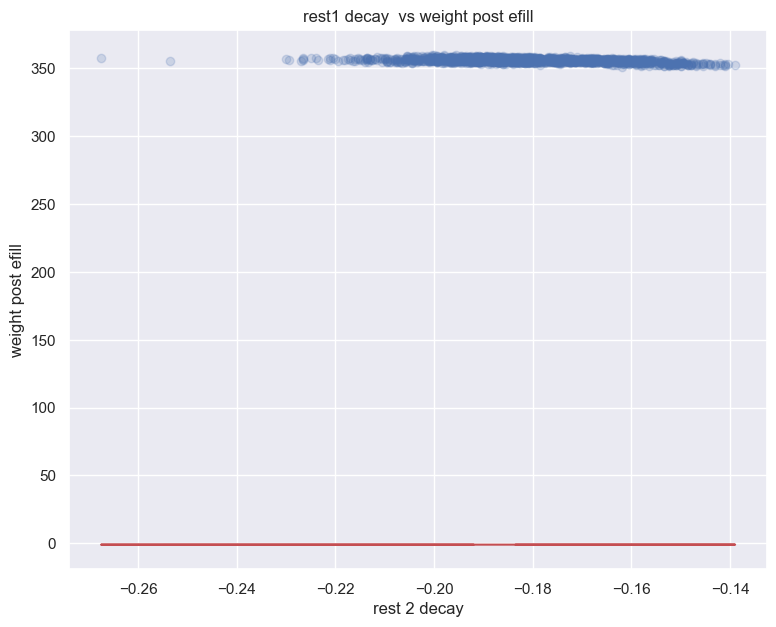

In [357]:
fig, ax = plt.subplots(figsize=(9, 7))
ax.scatter(df_full_new.rest_1_voltage_decay,df_full_new.weight_post_efill, alpha=0.2)
ax.plot(df_full_new.rest_1_voltage_decay, result.intercept + result.slope*df_full_new.rest_1_voltage_decay, 'r', label='fitted line')
ax.set_title("rest1 decay  vs weight post efill")
ax.set_xlabel("rest 2 decay")
ax.set_ylabel("weight post efill")


In [279]:

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

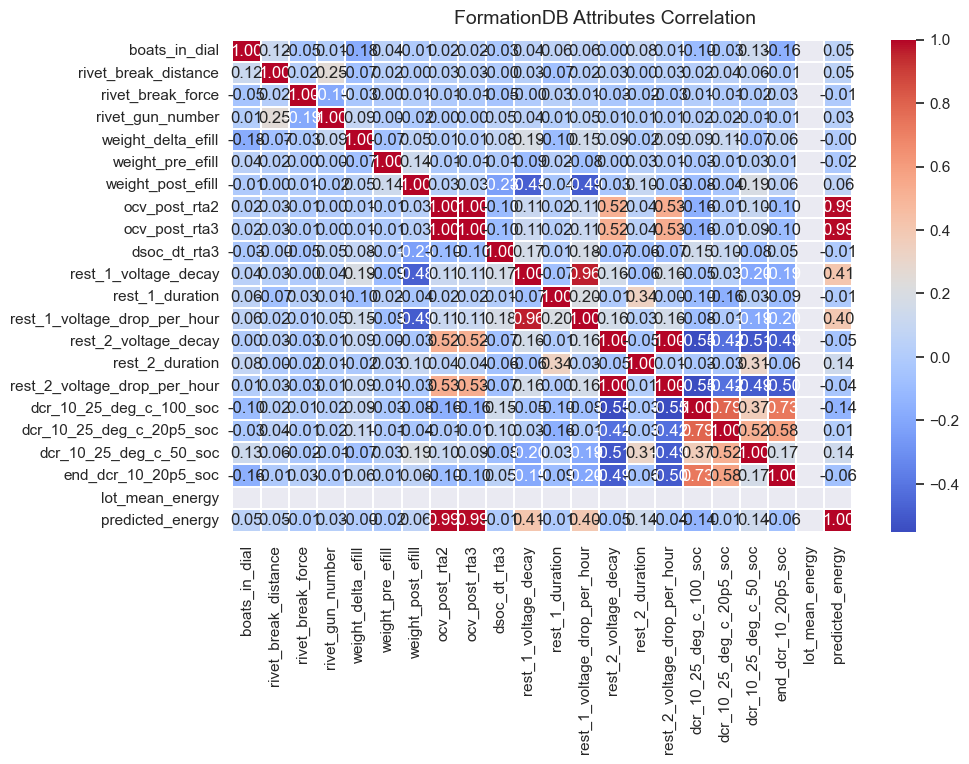

In [439]:
f, ax = plt.subplots(figsize=(10, 6))
corr = df_full_new.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('FormationDB Attributes Correlation ', fontsize=14)

In [246]:
df_full_new

serial location_name       boat_id  \
0     P1551370-10-D:STRR22152080B4D  cm2_49000_03  TRR75A000228   
1     P1551370-10-D:STRR22152080B7W  cm2_49000_02  TRR75A000261   
2     P1551370-10-D:STRR22152080B7Z  cm2_49000_02  TRR75A000005   
3     P1551370-10-D:STRR22152080BG3  cm2_49000_04  TRR75A000243   
4     P1551370-10-D:STRR22152080BGP  cm2_49000_04  TRR75A000243   
...                             ...           ...           ...   
1977  P1551370-10-D:STRR22152080DLB  cm2_49000_04  TRR75A000243   
1978  P1551370-10-D:STRR22152080DLC  cm2_49000_03  TRR75A000271   
1979  P1551370-10-D:STRR22152080DLE  cm2_49000_02  TRR75A000261   
1980  P1551370-10-D:STRR22152080DLF  cm2_49000_04  TRR75A000243   
1981  P1551370-10-D:STRR22152080DM7  cm2_49000_04  TRR75A000243   

      boats_in_dial cell_boat_position  rivet_break_distance  \
0               9.0                  9                  5.53   
1               6.0                  8                  3.42   
2               6.0                 10                  3.37   
3               6.0                 12                  3.46   
4               6.0                  5                  5.48   
...             ...                ...                   ...   
1977            7.0                 10                  3.56   
1978            9.0                  1                  3.22   
1979            7.0                  4                  6.21   
1980            7.0                  9                  3.41   
1981            7.0                  3                  3.31   

      rivet_break_force  rivet_gun_number       rivet_previous_lot  \
0                3255.0               3.0  P1637680-00-A:1T1639691   
1                2878.0               3.0  P1637689-00-A:1T1589984   
2                2780.0               4.0  P1637689-00-A:1T1589984   
3                2944.0               4.0  P1637680-00-A:1T1673073   
4                3093.0               2.0  P1637680-00-A:1T1673073   
...                 ...               ...                      ...   
1977             3127.0               4.0  P1637680-00-A:1T1673073   
1978             2801.0               1.0  P1637680-00-A:1T1639691   
1979             3159.0               2.0  P1637689-00-A:1T1589984   
1980             3140.0               3.0  P1637680-00-A:1T1673073   
1981             2975.0               1.0  P1637680-00-A:1T1673073   

      weight_delta_efill  weight_pre_efill  weight_post_efill baseline  \
0                  46.84            311.00             357.83     B034   
1                  46.73            310.86             357.60     B034   
2                  46.71            309.86             356.57     B034   
3                  46.99            309.30             356.29     B034   
4                  46.96            308.77             355.74     B034   
...                  ...               ...                ...      ...   
1977               46.92            308.76             355.68     B034   
1978               47.27            311.30             358.57     B034   
1979               46.99            311.21             358.19     B034   
1980               47.04            310.85             357.90     B034   
1981               47.01            309.73             356.74     B034   

      ocv_post_rta2  ocv_post_rta3  dsoc_dt_rta3  \
0          3.484424       3.483402     -0.000726   
1          3.479877       3.478906     -0.000681   
2          3.482665       3.481863     -0.000563   
3          3.488856       3.487830     -0.000825   
4          3.476050       3.475101     -0.000665   
...             ...            ...           ...   
1977       3.474307       3.473549     -0.000538   
1978       3.480576       3.479746     -0.000589   
1979       3.474624       3.473052     -0.001116   
1980       3.477001       3.476125     -0.000622   
1981       3.480226       3.479343     -0.000627   

                                   status_rta3  rest_1_voltage_decay  \
0     High Self-Discharge (>

In [251]:
df_formation = df_full_new[["serial","rest_1_voltage_decay","rest_1_duration","rest_2_voltage_decay","rest_2_duration","ocv_post_rta2","ocv_post_rta3","dsoc_dt_rta3","status_rta3",]]

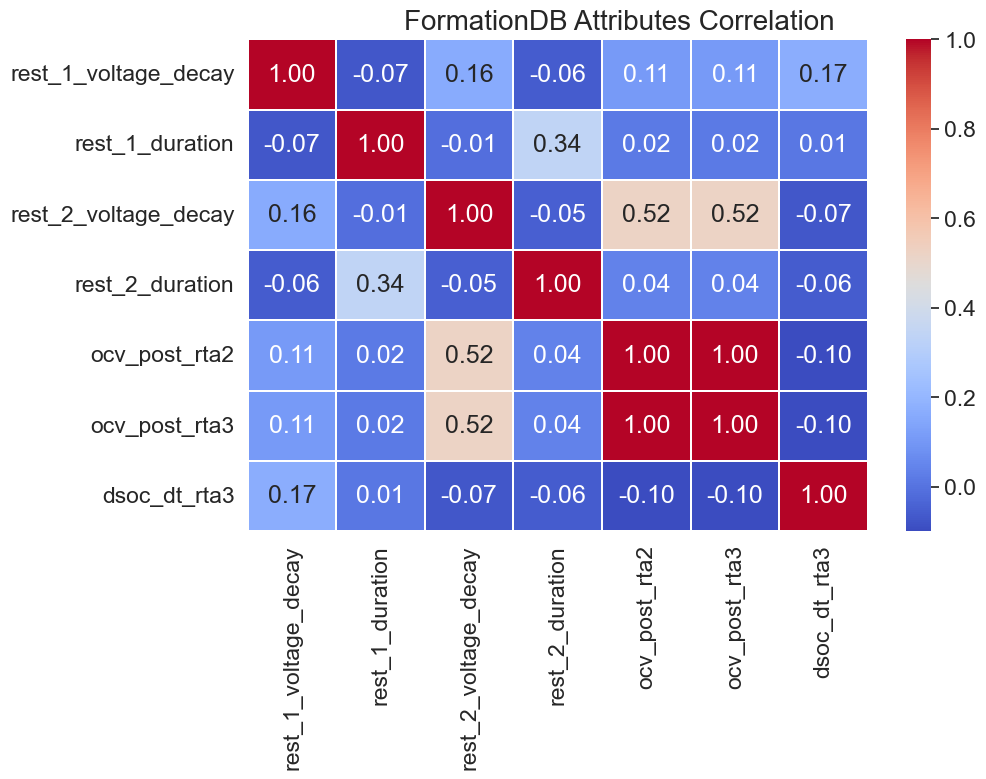

In [262]:
# hm.set_xticklabels(hm.get_xmajorticklabels(), fontsize = 25)
# hm.set_yticklabels(hm.get_ymajorticklabels(), fontsize = 25)

sns.set(font_scale=1.5)

f, ax = plt.subplots(figsize=(10, 6))
corr = df_formation.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('FormationDB Attributes Correlation ', fontsize=20)

In [272]:
df_full_new

serial location_name       boat_id  \
0     P1551370-10-D:STRR22152080B4D  cm2_49000_03  TRR75A000228   
1     P1551370-10-D:STRR22152080B7W  cm2_49000_02  TRR75A000261   
2     P1551370-10-D:STRR22152080B7Z  cm2_49000_02  TRR75A000005   
3     P1551370-10-D:STRR22152080BG3  cm2_49000_04  TRR75A000243   
4     P1551370-10-D:STRR22152080BGP  cm2_49000_04  TRR75A000243   
...                             ...           ...           ...   
1977  P1551370-10-D:STRR22152080DLB  cm2_49000_04  TRR75A000243   
1978  P1551370-10-D:STRR22152080DLC  cm2_49000_03  TRR75A000271   
1979  P1551370-10-D:STRR22152080DLE  cm2_49000_02  TRR75A000261   
1980  P1551370-10-D:STRR22152080DLF  cm2_49000_04  TRR75A000243   
1981  P1551370-10-D:STRR22152080DM7  cm2_49000_04  TRR75A000243   

      boats_in_dial cell_boat_position  rivet_break_distance  \
0               9.0                  9                  5.53   
1               6.0                  8                  3.42   
2               6.0                 10                  3.37   
3               6.0                 12                  3.46   
4               6.0                  5                  5.48   
...             ...                ...                   ...   
1977            7.0                 10                  3.56   
1978            9.0                  1                  3.22   
1979            7.0                  4                  6.21   
1980            7.0                  9                  3.41   
1981            7.0                  3                  3.31   

      rivet_break_force  rivet_gun_number       rivet_previous_lot  \
0                3255.0               3.0  P1637680-00-A:1T1639691   
1                2878.0               3.0  P1637689-00-A:1T1589984   
2                2780.0               4.0  P1637689-00-A:1T1589984   
3                2944.0               4.0  P1637680-00-A:1T1673073   
4                3093.0               2.0  P1637680-00-A:1T1673073   
...                 ...               ...                      ...   
1977             3127.0               4.0  P1637680-00-A:1T1673073   
1978             2801.0               1.0  P1637680-00-A:1T1639691   
1979             3159.0               2.0  P1637689-00-A:1T1589984   
1980             3140.0               3.0  P1637680-00-A:1T1673073   
1981             2975.0               1.0  P1637680-00-A:1T1673073   

      weight_delta_efill  weight_pre_efill  weight_post_efill baseline  \
0                  46.84            311.00             357.83     B034   
1                  46.73            310.86             357.60     B034   
2                  46.71            309.86             356.57     B034   
3                  46.99            309.30             356.29     B034   
4                  46.96            308.77             355.74     B034   
...                  ...               ...                ...      ...   
1977               46.92            308.76             355.68     B034   
1978               47.27            311.30             358.57     B034   
1979               46.99            311.21             358.19     B034   
1980               47.04            310.85             357.90     B034   
1981               47.01            309.73             356.74     B034   

      ocv_post_rta2  ocv_post_rta3  dsoc_dt_rta3  \
0          3.484424       3.483402     -0.000726   
1          3.479877       3.478906     -0.000681   
2          3.482665       3.481863     -0.000563   
3          3.488856       3.487830     -0.000825   
4          3.476050       3.475101     -0.000665   
...             ...            ...           ...   
1977       3.474307       3.473549     -0.000538   
1978       3.480576       3.479746     -0.000589   
1979       3.474624       3.473052     -0.001116   
1980       3.477001       3.476125     -0.000622   
1981       3.480226       3.479343     -0.000627   

                                   status_rta3  rest_1_voltage_decay  \
0     High Self-Discharge (>

In [271]:
df_full_new[df_full_new.rest_2_voltage_decay < -0.4]

Empty DataFrame
Columns: [serial, location_name, boat_id, boats_in_dial, cell_boat_position, rivet_break_distance, rivet_break_force, rivet_gun_number, rivet_previous_lot, weight_delta_efill, weight_pre_efill, weight_post_efill, baseline, ocv_post_rta2, ocv_post_rta3, dsoc_dt_rta3, status_rta3, rest_1_voltage_decay, rest_1_duration, rest_1_voltage_drop_per_hour, rest_2_voltage_decay, rest_2_duration, rest_2_voltage_drop_per_hour, dcr_10_25_deg_c_100_soc, dcr_10_25_deg_c_20p5_soc, dcr_10_25_deg_c_50_soc, end_dcr_10_20p5_soc, lot_mean_energy, predicted_energy]
Index: []

In [273]:
df_full_new1 = df_full_new[df_full_new.ocv_post_rta3 > 3.4]
df_full_new1 = df_full_new[df_full_new.ocv_post_rta2 > 3.4]


In [327]:
df_pass_new = df_full_new1[df_full_new1.status_rta3 == "pass"]
df_fail_new = df_full_new1[df_full_new1.status_rta3 != "pass"]

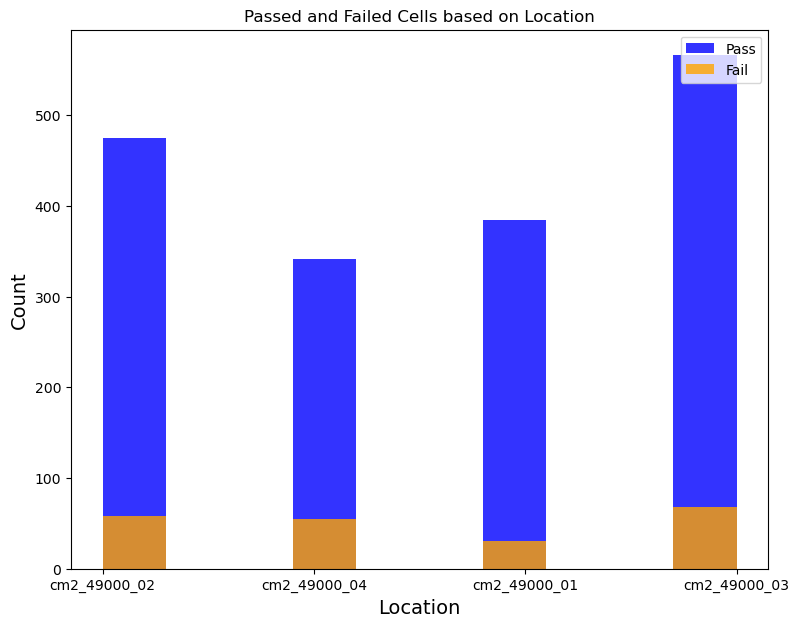

In [328]:
fig, ax = plt.subplots(figsize=(9, 7))
ax.hist(df_pass_new.location_name, bins=10, alpha=0.8, label="Pass", color="blue");
ax.hist(df_fail_new.location_name, bins=10, alpha=0.8, label="Fail", color="orange");
ax.set_title("Passed and Failed Cells based on Location")
ax.set_xlabel("Location", size=14)
ax.set_ylabel("Count", size=14)
ax.legend(loc='upper right')

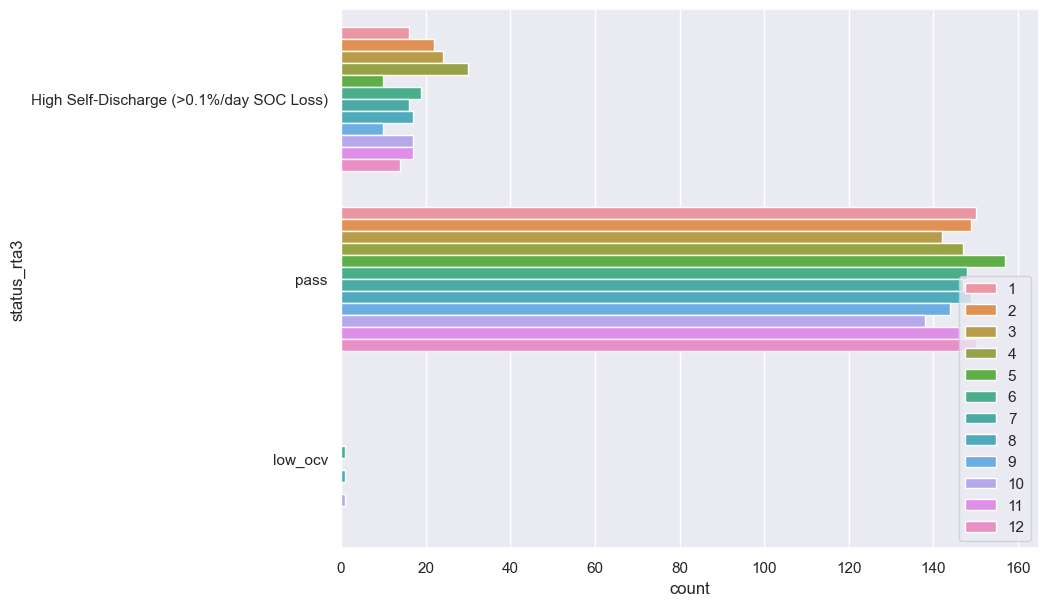

In [367]:
sns.set(rc = {'figure.figsize':(9,7)})
ax = sns.countplot(y="status_rta3", hue="cell_boat_position",data=df_full_efill)
ax.legend(loc='lower right')

In [326]:
df_full_new1

serial location_name       boat_id  \
0     P1551370-10-D:STRR22152080B4D  cm2_49000_03  TRR75A000228   
1     P1551370-10-D:STRR22152080B7W  cm2_49000_02  TRR75A000261   
2     P1551370-10-D:STRR22152080B7Z  cm2_49000_02  TRR75A000005   
3     P1551370-10-D:STRR22152080BG3  cm2_49000_04  TRR75A000243   
4     P1551370-10-D:STRR22152080BGP  cm2_49000_04  TRR75A000243   
...                             ...           ...           ...   
1977  P1551370-10-D:STRR22152080DLB  cm2_49000_04  TRR75A000243   
1978  P1551370-10-D:STRR22152080DLC  cm2_49000_03  TRR75A000271   
1979  P1551370-10-D:STRR22152080DLE  cm2_49000_02  TRR75A000261   
1980  P1551370-10-D:STRR22152080DLF  cm2_49000_04  TRR75A000243   
1981  P1551370-10-D:STRR22152080DM7  cm2_49000_04  TRR75A000243   

      boats_in_dial cell_boat_position  rivet_break_distance  \
0               9.0                  9                  5.53   
1               6.0                  8                  3.42   
2               6.0                 10                  3.37   
3               6.0                 12                  3.46   
4               6.0                  5                  5.48   
...             ...                ...                   ...   
1977            7.0                 10                  3.56   
1978            9.0                  1                  3.22   
1979            7.0                  4                  6.21   
1980            7.0                  9                  3.41   
1981            7.0                  3                  3.31   

      rivet_break_force  rivet_gun_number       rivet_previous_lot  \
0                3255.0               3.0  P1637680-00-A:1T1639691   
1                2878.0               3.0  P1637689-00-A:1T1589984   
2                2780.0               4.0  P1637689-00-A:1T1589984   
3                2944.0               4.0  P1637680-00-A:1T1673073   
4                3093.0               2.0  P1637680-00-A:1T1673073   
...                 ...               ...                      ...   
1977             3127.0               4.0  P1637680-00-A:1T1673073   
1978             2801.0               1.0  P1637680-00-A:1T1639691   
1979             3159.0               2.0  P1637689-00-A:1T1589984   
1980             3140.0               3.0  P1637680-00-A:1T1673073   
1981             2975.0               1.0  P1637680-00-A:1T1673073   

      weight_delta_efill  weight_pre_efill  weight_post_efill baseline  \
0                  46.84            311.00             357.83     B034   
1                  46.73            310.86             357.60     B034   
2                  46.71            309.86             356.57     B034   
3                  46.99            309.30             356.29     B034   
4                  46.96            308.77             355.74     B034   
...                  ...               ...                ...      ...   
1977               46.92            308.76             355.68     B034   
1978               47.27            311.30             358.57     B034   
1979               46.99            311.21             358.19     B034   
1980               47.04            310.85             357.90     B034   
1981               47.01            309.73             356.74     B034   

      ocv_post_rta2  ocv_post_rta3  dsoc_dt_rta3  \
0          3.484424       3.483402     -0.000726   
1          3.479877       3.478906     -0.000681   
2          3.482665       3.481863     -0.000563   
3          3.488856       3.487830     -0.000825   
4          3.476050       3.475101     -0.000665   
...             ...            ...           ...   
1977       3.474307       3.473549     -0.000538   
1978       3.480576       3.479746     -0.000589   
1979       3.474624       3.473052     -0.001116   
1980       3.477001       3.476125     -0.000622   
1981       3.480226       3.479343     -0.000627   

                                   status_rta3  rest_1_voltage_decay  \
0     High Self-Discharge (>

Text(0, 0.5, 'ocv rta2')

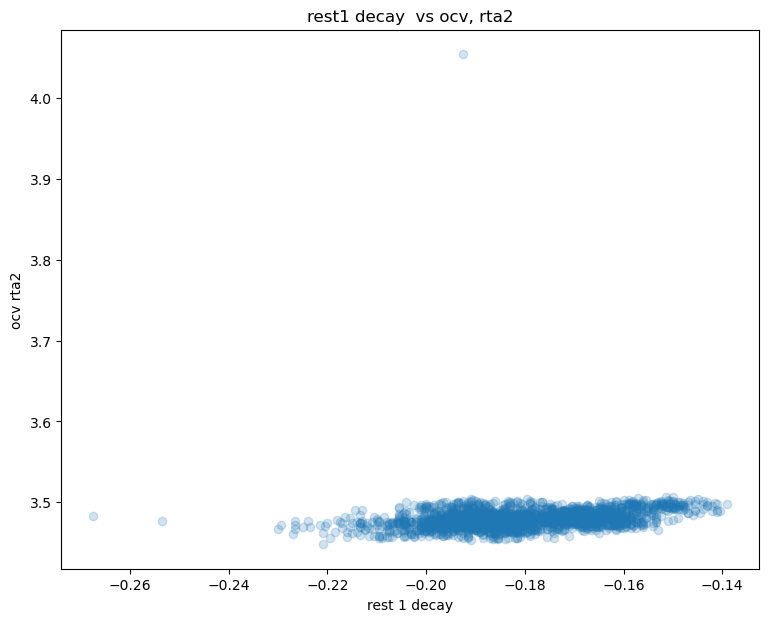

In [278]:
fig, ax = plt.subplots(figsize=(9, 7))
ax.scatter(df_full_new1.rest_1_voltage_decay,df_full_new1.ocv_post_rta3, alpha=0.2)
ax.set_title("rest1 decay  vs ocv, rta2")
ax.set_xlabel("rest 1 decay")
ax.set_ylabel("ocv rta2")
#filter cell qith ocr below 3.4


In [332]:
df_full_new1

serial location_name       boat_id  \
0     P1551370-10-D:STRR22152080B4D  cm2_49000_03  TRR75A000228   
1     P1551370-10-D:STRR22152080B7W  cm2_49000_02  TRR75A000261   
2     P1551370-10-D:STRR22152080B7Z  cm2_49000_02  TRR75A000005   
3     P1551370-10-D:STRR22152080BG3  cm2_49000_04  TRR75A000243   
4     P1551370-10-D:STRR22152080BGP  cm2_49000_04  TRR75A000243   
...                             ...           ...           ...   
1977  P1551370-10-D:STRR22152080DLB  cm2_49000_04  TRR75A000243   
1978  P1551370-10-D:STRR22152080DLC  cm2_49000_03  TRR75A000271   
1979  P1551370-10-D:STRR22152080DLE  cm2_49000_02  TRR75A000261   
1980  P1551370-10-D:STRR22152080DLF  cm2_49000_04  TRR75A000243   
1981  P1551370-10-D:STRR22152080DM7  cm2_49000_04  TRR75A000243   

      boats_in_dial cell_boat_position  rivet_break_distance  \
0               9.0                  9                  5.53   
1               6.0                  8                  3.42   
2               6.0                 10                  3.37   
3               6.0                 12                  3.46   
4               6.0                  5                  5.48   
...             ...                ...                   ...   
1977            7.0                 10                  3.56   
1978            9.0                  1                  3.22   
1979            7.0                  4                  6.21   
1980            7.0                  9                  3.41   
1981            7.0                  3                  3.31   

      rivet_break_force  rivet_gun_number       rivet_previous_lot  \
0                3255.0               3.0  P1637680-00-A:1T1639691   
1                2878.0               3.0  P1637689-00-A:1T1589984   
2                2780.0               4.0  P1637689-00-A:1T1589984   
3                2944.0               4.0  P1637680-00-A:1T1673073   
4                3093.0               2.0  P1637680-00-A:1T1673073   
...                 ...               ...                      ...   
1977             3127.0               4.0  P1637680-00-A:1T1673073   
1978             2801.0               1.0  P1637680-00-A:1T1639691   
1979             3159.0               2.0  P1637689-00-A:1T1589984   
1980             3140.0               3.0  P1637680-00-A:1T1673073   
1981             2975.0               1.0  P1637680-00-A:1T1673073   

      weight_delta_efill  weight_pre_efill  weight_post_efill baseline  \
0                  46.84            311.00             357.83     B034   
1                  46.73            310.86             357.60     B034   
2                  46.71            309.86             356.57     B034   
3                  46.99            309.30             356.29     B034   
4                  46.96            308.77             355.74     B034   
...                  ...               ...                ...      ...   
1977               46.92            308.76             355.68     B034   
1978               47.27            311.30             358.57     B034   
1979               46.99            311.21             358.19     B034   
1980               47.04            310.85             357.90     B034   
1981               47.01            309.73             356.74     B034   

      ocv_post_rta2  ocv_post_rta3  dsoc_dt_rta3  \
0          3.484424       3.483402     -0.000726   
1          3.479877       3.478906     -0.000681   
2          3.482665       3.481863     -0.000563   
3          3.488856       3.487830     -0.000825   
4          3.476050       3.475101     -0.000665   
...             ...            ...           ...   
1977       3.474307       3.473549     -0.000538   
1978       3.480576       3.479746     -0.000589   
1979       3.474624       3.473052     -0.001116   
1980       3.477001       3.476125     -0.000622   
1981       3.480226       3.479343     -0.000627   

                                   status_rta3  rest_1_voltage_decay  \
0     High Self-Discharge (>

Intercept, Rvalue, Pvalue, Std Error. r-squared Value
LinregressResult(slope=17.36787260281109, intercept=-0.16995138321914122, rvalue=0.17474292825078513, pvalue=4.917550833182034e-15, stderr=2.200947726450618, intercept_stderr=0.0013845210389017667) 0.030535090973659043


Text(-0.00385, -0.152, 'R-squared value: 0.0784')

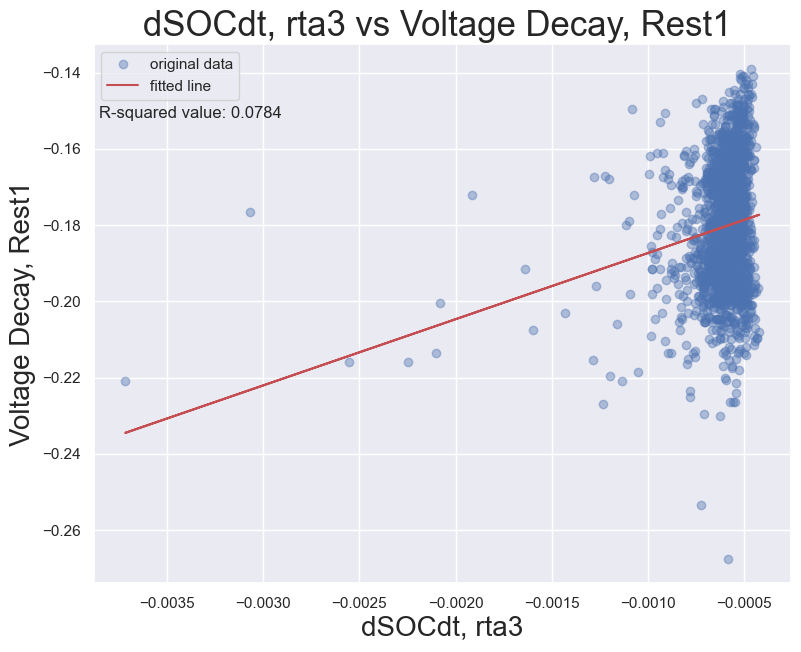

In [349]:
mask = ~np.isnan(df_full_new1.dsoc_dt_rta3) & ~np.isnan(df_full_new1.rest_1_voltage_decay)
result = stats.linregress(df_full_new1.dsoc_dt_rta3[mask], df_full_new1.rest_1_voltage_decay[mask])

print("Intercept, Rvalue, Pvalue, Std Error. r-squared Value")
print(result, result.rvalue**2)

fig, ax = plt.subplots(figsize=(9, 7))
ax.plot(df_full_new1.dsoc_dt_rta3, df_full_new1.rest_1_voltage_decay, 'o', label='original data', alpha=0.4)
ax.plot(df_full_new1.dsoc_dt_rta3, result.intercept + result.slope*df_full_new1.dsoc_dt_rta3, 'r', label='fitted line')
ax.set_title("dSOCdt, rta3 vs Voltage Decay, Rest1 ", fontsize = 25)
ax.set_ylabel("Voltage Decay, Rest1", fontsize = 20)
ax.set_xlabel("dSOCdt, rta3", fontsize = 20)
ax.legend()
ax.text(-0.00385, -0.152, 'R-squared value: 0.0784')




Intercept, Rvalue, Pvalue, Std Error. r-squared Value
LinregressResult(slope=0.22915812061100946, intercept=-0.9779664477480278, rvalue=0.2373936598967203, pvalue=9.393237193705513e-27, stderr=0.021089532378525656, intercept_stderr=0.07339086824728265) 0.056355749759159704


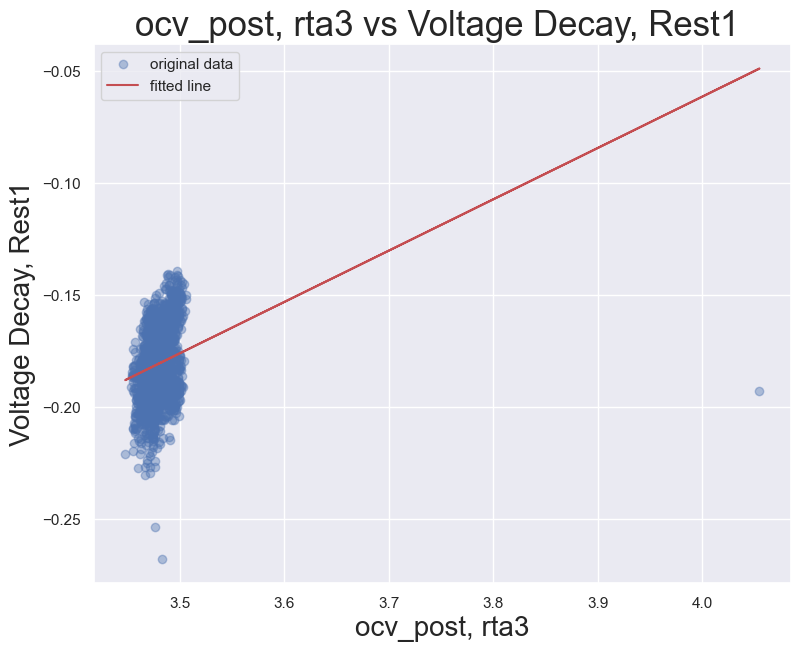

In [351]:
mask = ~np.isnan(df_full_new1.ocv_post_rta3) & ~np.isnan(df_full_new1.rest_1_voltage_decay)
result = stats.linregress(df_full_new1.ocv_post_rta3[mask], df_full_new1.rest_1_voltage_decay[mask])

print("Intercept, Rvalue, Pvalue, Std Error. r-squared Value")
print(result, result.rvalue**2)

fig, ax = plt.subplots(figsize=(9, 7))
ax.plot(df_full_new1.ocv_post_rta3, df_full_new1.rest_1_voltage_decay, 'o', label='original data', alpha=0.4)
ax.plot(df_full_new1.ocv_post_rta3, result.intercept + result.slope*df_full_new1.ocv_post_rta3, 'r', label='fitted line')
ax.set_title("ocv_post, rta3 vs Voltage Decay, Rest1 ", fontsize = 25)
ax.set_ylabel("Voltage Decay, Rest1", fontsize = 20)
ax.set_xlabel("ocv_post, rta3", fontsize = 20)
ax.legend()
# ax.text(-0.00385, -0.152, 'R-squared value: 0.0784')




In [378]:
df_full_new2 = df_full_new1[df_full_new1.ocv_post_rta3 < 3.6]

In [379]:
df_full_new2

serial location_name       boat_id  \
0     P1551370-10-D:STRR22152080B4D  cm2_49000_03  TRR75A000228   
1     P1551370-10-D:STRR22152080B7W  cm2_49000_02  TRR75A000261   
2     P1551370-10-D:STRR22152080B7Z  cm2_49000_02  TRR75A000005   
3     P1551370-10-D:STRR22152080BG3  cm2_49000_04  TRR75A000243   
4     P1551370-10-D:STRR22152080BGP  cm2_49000_04  TRR75A000243   
...                             ...           ...           ...   
1977  P1551370-10-D:STRR22152080DLB  cm2_49000_04  TRR75A000243   
1978  P1551370-10-D:STRR22152080DLC  cm2_49000_03  TRR75A000271   
1979  P1551370-10-D:STRR22152080DLE  cm2_49000_02  TRR75A000261   
1980  P1551370-10-D:STRR22152080DLF  cm2_49000_04  TRR75A000243   
1981  P1551370-10-D:STRR22152080DM7  cm2_49000_04  TRR75A000243   

      boats_in_dial cell_boat_position  rivet_break_distance  \
0               9.0                  9                  5.53   
1               6.0                  8                  3.42   
2               6.0                 10                  3.37   
3               6.0                 12                  3.46   
4               6.0                  5                  5.48   
...             ...                ...                   ...   
1977            7.0                 10                  3.56   
1978            9.0                  1                  3.22   
1979            7.0                  4                  6.21   
1980            7.0                  9                  3.41   
1981            7.0                  3                  3.31   

      rivet_break_force  rivet_gun_number       rivet_previous_lot  \
0                3255.0               3.0  P1637680-00-A:1T1639691   
1                2878.0               3.0  P1637689-00-A:1T1589984   
2                2780.0               4.0  P1637689-00-A:1T1589984   
3                2944.0               4.0  P1637680-00-A:1T1673073   
4                3093.0               2.0  P1637680-00-A:1T1673073   
...                 ...               ...                      ...   
1977             3127.0               4.0  P1637680-00-A:1T1673073   
1978             2801.0               1.0  P1637680-00-A:1T1639691   
1979             3159.0               2.0  P1637689-00-A:1T1589984   
1980             3140.0               3.0  P1637680-00-A:1T1673073   
1981             2975.0               1.0  P1637680-00-A:1T1673073   

      weight_delta_efill  weight_pre_efill  weight_post_efill baseline  \
0                  46.84            311.00             357.83     B034   
1                  46.73            310.86             357.60     B034   
2                  46.71            309.86             356.57     B034   
3                  46.99            309.30             356.29     B034   
4                  46.96            308.77             355.74     B034   
...                  ...               ...                ...      ...   
1977               46.92            308.76             355.68     B034   
1978               47.27            311.30             358.57     B034   
1979               46.99            311.21             358.19     B034   
1980               47.04            310.85             357.90     B034   
1981               47.01            309.73             356.74     B034   

      ocv_post_rta2  ocv_post_rta3  dsoc_dt_rta3  \
0          3.484424       3.483402     -0.000726   
1          3.479877       3.478906     -0.000681   
2          3.482665       3.481863     -0.000563   
3          3.488856       3.487830     -0.000825   
4          3.476050       3.475101     -0.000665   
...             ...            ...           ...   
1977       3.474307       3.473549     -0.000538   
1978       3.480576       3.479746     -0.000589   
1979       3.474624       3.473052     -0.001116   
1980       3.477001       3.476125     -0.000622   
1981       3.480226       3.479343     -0.000627   

                                   status_rta3  rest_1_voltage_decay  \
0     High Self-Discharge (>

Intercept, Rvalue, Pvalue, Std Error. r-squared Value
LinregressResult(slope=0.6165807603396043, intercept=-2.3259837755402657, rvalue=0.4000820719318115, pvalue=6.383944405179114e-77, stderr=0.03177386717860859, intercept_stderr=0.11056200169168254) 0.16006566428125119


Text(3.446, -0.152, 'R-squared value: 0.0784')

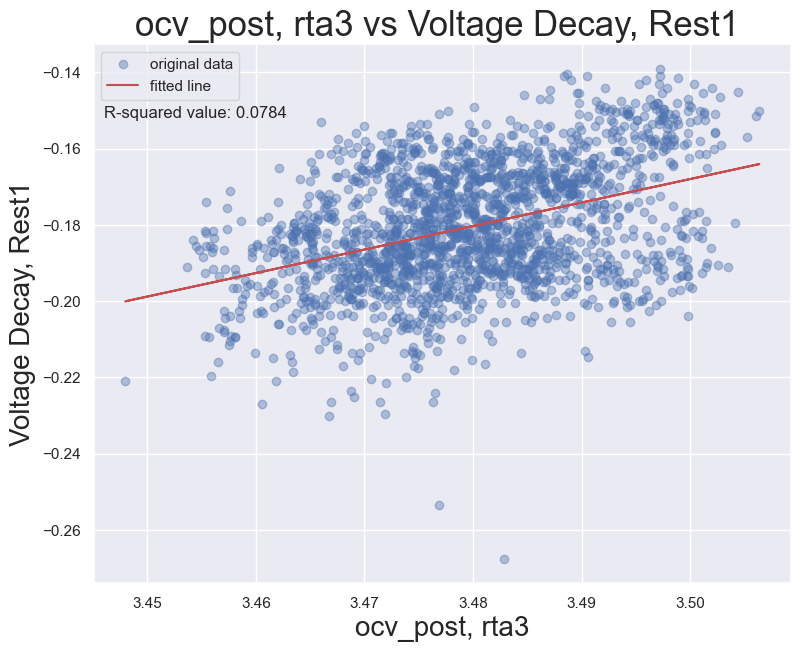

In [477]:
mask = ~np.isnan(df_full_new2.ocv_post_rta3) & ~np.isnan(df_full_new2.rest_1_voltage_decay)
result = stats.linregress(df_full_new2.ocv_post_rta3[mask], df_full_new2.rest_1_voltage_decay[mask])

print("Intercept, Rvalue, Pvalue, Std Error. r-squared Value")
print(result, result.rvalue**2)

fig, ax = plt.subplots(figsize=(9, 7))
ax.plot(df_full_new2.ocv_post_rta3, df_full_new2.rest_1_voltage_decay, 'o', label='original data', alpha=0.4)
ax.plot(df_full_new2.ocv_post_rta3, result.intercept + result.slope*df_full_new2.ocv_post_rta3, 'r', label='fitted line')
ax.set_title("ocv_post, rta3 vs Voltage Decay, Rest1 ", fontsize = 25)
ax.set_ylabel("Voltage Decay, Rest1", fontsize = 20)
ax.set_xlabel("ocv_post, rta3", fontsize = 20)
ax.legend()
ax.text(3.446, -0.152, 'R-squared value: 0.0784')


In [390]:
df_full

serial baseline  ocv_post_rta2  ocv_post_rta3  \
0      P1551370-10-D:STRR22152080FSH     B034       3.481154       3.480364   
1      P1551370-10-D:STRR22152080FED     B034       3.480917       3.480169   
2      P1551370-10-D:STRR22152080CYW     B034       3.479401       3.478682   
3      P1551370-10-D:STRR22152080FG0     B034       3.487090       3.486235   
4      P1551370-10-D:STRR22152080FFW     B034       3.477966       3.476833   
...                              ...      ...            ...            ...   
48805  P1551370-10-D:STRR221500G0D7P     B034       3.475397       3.474571   
48806  P1551370-10-D:STRR221500G0D8R     B034       3.480309       3.479565   
48807  P1551370-10-D:STRR221500G0D8N     B034       3.475437       3.474627   
48808  P1551370-10-D:STRR221500G0D60     B034       3.476322       3.475572   
48809  P1551370-10-D:STRR221500G0D7V     B034       3.474824       3.474014   

       dsoc_dt_rta3                               status_rta3  \
0         -0.000549                                      pass   
1         -0.000520                                      pass   
2         -0.000500                                      pass   
3         -0.000683                                      pass   
4         -0.000788  High Self-Discharge (>0.1%/day SOC Loss)   
...             ...                                       ...   
48805     -0.000579                                      pass   
48806     -0.000521                                      pass   
48807     -0.000568                                      pass   
48808     -0.000526                                      pass   
48809     -0.000568                                      pass   

       rest_1_voltage_decay  rest_1_duration  rest_1_voltage_drop_per_hour  \
0                   -0.1965        12.599042                     -0.015596   
1                   -0.1675        12.599042                     -0.013295   
2                   -0.1605        12.599042                     -0.012739   
3                   -0.1865        12.599042                     -0.014803   
4                   -0.1685        12.599042                     -0.013374   
...                     ...              ...                           ...   
48805               -0.1960        12.171084                     -0.016104   
48806               -0.1735        12.171084                     -0.014255   
48807               -0.2130        12.171084                     -0.017501   
48808               -0.2075        12.171084                     -0.017049   
48809               -0.1865        12.171084                     -0.015323   

       rest_2_voltage_decay  rest_2_duration  rest_2_voltage_drop_per_hour  \
0                   -0.0540        24.323010                     -0.002220   
1                   -0.0410        24.323010                     -0.001686   
2                   -0.0400        24.323010                     -0.001645   
3                   -0.0540        24.323010                     -0.002220   
4                   -0.0475        24.323010                     -0.001953   
...                     ...              ...                           ...   
48805               -0.0570        24.216239                     -0.002354   
48806               -0.0465        24.216239                     -0.001920   
48807               -0.0505        24.216239                     -0.002085   
48808               -0.0435        24.216239                     -0.001796   
48809               -0.0485        24.216239                     -0.002003   

       dcr_10_25_deg_c_100_soc  dcr_10_25_deg_c_20p5_soc  \
0                     0.005425                  0.004750   
1                     0.005001                  0.004629   
2                     0.005500                  0.004971   
3                     0.005294                  0.004692   
4                     0.005658                  0.005324   
...                        ...                       ...   
48805 

In [393]:
query = f"""
select * from cellmfg.efill_task_results
where component_id in %(serials)s
"""

df_efill_test = comp.fetch(query, params={"serials": serials[:10]}) # we have to chunk this query up, can't pull all the data at once.

df_efill = pd.DataFrame(columns=df_efill_test.columns)

chunk_size = 1000
for i in range(len(serials)//chunk_size + 1)[:50]:
    serials_chunk = serials[i*chunk_size:(i+1)*chunk_size]
    df_chunk = comp.fetch(query, params={"serials": serials_chunk})
    df_efill = pd.concat([df_efill, df_chunk])

print(len(df_efill))
df_efill.head()

44518


id                   component_id  \
0  ca1e4a21-4555-4a9e-8fdc-2ffdfa439325  P1551370-10-D:STRR22152080B4D   
1  c06ff54f-5f85-44fc-8847-865dca238006  P1551370-10-D:STRR22152080B7W   
2  cfa456d6-33bc-40bc-b9d5-23c3dffe9072  P1551370-10-D:STRR22152080B7Z   
3  503dbb06-cc11-4223-b906-cd3dd1af5e85  P1551370-10-D:STRR22152080BG3   
4  9129af93-5860-4709-bc7b-c51560a943fb  P1551370-10-D:STRR22152080BGP   

       step_name step_completed location_name step_start_observed_at  \
0  100_cm2_49000              0  cm2_49000_03    2022-06-01 12:02:29   
1  100_cm2_49000              0  cm2_49000_02    2022-06-01 11:14:22   
2  100_cm2_49000              0  cm2_49000_02    2022-06-01 11:14:22   
3  100_cm2_49000              0  cm2_49000_04    2022-06-01 09:17:38   
4  100_cm2_49000              0  cm2_49000_04    2022-06-01 09:17:37   

  step_complete_observed_at written_to_kafka_at ion_event_dt       boat_id  \
0       2022-06-01 12:08:04 2022-06-01 12:08:15     20220601  TRR75A000228   
1       2022-06-01 11:20:03 2022-06-01 11:20:13     20220601  TRR75A000261   
2       2022-06-01 11:20:03 2022-06-01 11:20:13     20220601  TRR75A000005   
3       2022-06-01 09:27:49 2022-06-01 09:28:00     20220601  TRR75A000243   
4       2022-06-01 09:27:49 2022-06-01 09:27:59     20220601  TRR75A000243   

   boats_in_dial cell_boat_position efill_leak_test_okay  efill_reject_code  \
0            9.0                  9                 None                0.0   
1            6.0                  8                 None                0.0   
2            6.0                 10                 None                0.0   
3            6.0                 12                 None                0.0   
4            6.0                  5                 None                0.0   

      efill_timestamp      electrolyte_previous_lot  enabled_heads fill_head  \
0 2022-06-01 12:05:20  P1614626-00-A:STT4161790100B            9.0         2   
1 2022-06-01 11:16:16  P1614626-00-A:STT4161790100B           11.0        12   
2 2022-06-01 11:16:16  P1614626-00-A:STT4161790100B           11.0        12   
3 2022-06-01 09:18:56  P1614626-00-A:STT4161790100B            9.0        10   
4 2022-06-01 09:18:56  P1614626-00-A:STT4161790100B            9.0        10   

   num_gun_feeds plunge_count plunge_time preweigh_lower_spec_okay  \
0           83.0         None        None                     None   
1          354.0         None        None                     None   
2          359.0         None        None                     None   
3         1677.0         None        None                     None   
4           56.0         None        None                     None   

   rivet_break_distance  rivet_break_force  rivet_gun_number rivet_okay  \
0                  5.53             3255.0               3.0       None   
1                  3.42             2878.0               3.0       None   
2                  3.37             2780.0               4.0       None   
3                  3.46             2944.0               4.0       None   
4                  5.48             3093.0               2.0       None   

        rivet_previous_lot  weight_delta_efill  weight_post_efill  \
0  P1637680-00-A:1T1639691               46.84             357.83   
1  P1637689-00-A:1T1589984               46.73             357.60   
2  P1637689-00-A:1T1589984               46.71             356.57   
3  P1637680-00-A:1T1673073               46.99             356.29   
4  P1637680-00-A:1T1673073               46.96             355.74   

   weight_pre_efill process_name process_variant_name  
0            311.00     assembly                 base  
1            310.86     assembly                 base  
2            309.86     assembly                 base  
3            309.30     assembly                 base  
4            308.77     assembly                 base

In [395]:
df_efill = df_efill.rename(columns={"component_id":"serial"})


id                         serial  \
0  ca1e4a21-4555-4a9e-8fdc-2ffdfa439325  P1551370-10-D:STRR22152080B4D   
1  c06ff54f-5f85-44fc-8847-865dca238006  P1551370-10-D:STRR22152080B7W   
2  cfa456d6-33bc-40bc-b9d5-23c3dffe9072  P1551370-10-D:STRR22152080B7Z   
3  503dbb06-cc11-4223-b906-cd3dd1af5e85  P1551370-10-D:STRR22152080BG3   
4  9129af93-5860-4709-bc7b-c51560a943fb  P1551370-10-D:STRR22152080BGP   

       step_name step_completed location_name step_start_observed_at  \
0  100_cm2_49000              0  cm2_49000_03    2022-06-01 12:02:29   
1  100_cm2_49000              0  cm2_49000_02    2022-06-01 11:14:22   
2  100_cm2_49000              0  cm2_49000_02    2022-06-01 11:14:22   
3  100_cm2_49000              0  cm2_49000_04    2022-06-01 09:17:38   
4  100_cm2_49000              0  cm2_49000_04    2022-06-01 09:17:37   

  step_complete_observed_at written_to_kafka_at ion_event_dt       boat_id  \
0       2022-06-01 12:08:04 2022-06-01 12:08:15     20220601  TRR75A000228   
1       2022-06-01 11:20:03 2022-06-01 11:20:13     20220601  TRR75A000261   
2       2022-06-01 11:20:03 2022-06-01 11:20:13     20220601  TRR75A000005   
3       2022-06-01 09:27:49 2022-06-01 09:28:00     20220601  TRR75A000243   
4       2022-06-01 09:27:49 2022-06-01 09:27:59     20220601  TRR75A000243   

   boats_in_dial cell_boat_position efill_leak_test_okay  efill_reject_code  \
0            9.0                  9                 None                0.0   
1            6.0                  8                 None                0.0   
2            6.0                 10                 None                0.0   
3            6.0                 12                 None                0.0   
4            6.0                  5                 None                0.0   

      efill_timestamp      electrolyte_previous_lot  enabled_heads fill_head  \
0 2022-06-01 12:05:20  P1614626-00-A:STT4161790100B            9.0         2   
1 2022-06-01 11:16:16  P1614626-00-A:STT4161790100B           11.0        12   
2 2022-06-01 11:16:16  P1614626-00-A:STT4161790100B           11.0        12   
3 2022-06-01 09:18:56  P1614626-00-A:STT4161790100B            9.0        10   
4 2022-06-01 09:18:56  P1614626-00-A:STT4161790100B            9.0        10   

   num_gun_feeds plunge_count plunge_time preweigh_lower_spec_okay  \
0           83.0         None        None                     None   
1          354.0         None        None                     None   
2          359.0         None        None                     None   
3         1677.0         None        None                     None   
4           56.0         None        None                     None   

   rivet_break_distance  rivet_break_force  rivet_gun_number rivet_okay  \
0                  5.53             3255.0               3.0       None   
1                  3.42             2878.0               3.0       None   
2                  3.37             2780.0               4.0       None   
3                  3.46             2944.0               4.0       None   
4                  5.48             3093.0               2.0       None   

        rivet_previous_lot  weight_delta_efill  weight_post_efill  \
0  P1637680-00-A:1T1639691               46.84             357.83   
1  P1637689-00-A:1T1589984               46.73             357.60   
2  P1637689-00-A:1T1589984               46.71             356.57   
3  P1637680-00-A:1T1673073               46.99             356.29   
4  P1637680-00-A:1T1673073               46.96             355.74   

   weight_pre_efill process_name process_variant_name  
0            311.00     assembly                 base  
1            310.86     assembly                 base  
2            309.86     assembly                 base  
3            309.30     assembly                 base  
4            308.77     assembly                 base

In [397]:
df_use = df_full.merge(df_efill, on="serial")
df_use

serial baseline  ocv_post_rta2  ocv_post_rta3  \
0      P1551370-10-D:STRR22152080FSH     B034       3.481154       3.480364   
1      P1551370-10-D:STRR22152080FED     B034       3.480917       3.480169   
2      P1551370-10-D:STRR22152080CYW     B034       3.479401       3.478682   
3      P1551370-10-D:STRR22152080FG0     B034       3.487090       3.486235   
4      P1551370-10-D:STRR22152080FFW     B034       3.477966       3.476833   
...                              ...      ...            ...            ...   
44467  P1551370-10-D:STRR221500G0D7P     B034       3.475397       3.474571   
44468  P1551370-10-D:STRR221500G0D8R     B034       3.480309       3.479565   
44469  P1551370-10-D:STRR221500G0D8N     B034       3.475437       3.474627   
44470  P1551370-10-D:STRR221500G0D60     B034       3.476322       3.475572   
44471  P1551370-10-D:STRR221500G0D7V     B034       3.474824       3.474014   

       dsoc_dt_rta3                               status_rta3  \
0         -0.000549                                      pass   
1         -0.000520                                      pass   
2         -0.000500                                      pass   
3         -0.000683                                      pass   
4         -0.000788  High Self-Discharge (>0.1%/day SOC Loss)   
...             ...                                       ...   
44467     -0.000579                                      pass   
44468     -0.000521                                      pass   
44469     -0.000568                                      pass   
44470     -0.000526                                      pass   
44471     -0.000568                                      pass   

       rest_1_voltage_decay  rest_1_duration  rest_1_voltage_drop_per_hour  \
0                   -0.1965        12.599042                     -0.015596   
1                   -0.1675        12.599042                     -0.013295   
2                   -0.1605        12.599042                     -0.012739   
3                   -0.1865        12.599042                     -0.014803   
4                   -0.1685        12.599042                     -0.013374   
...                     ...              ...                           ...   
44467               -0.1960        12.171084                     -0.016104   
44468               -0.1735        12.171084                     -0.014255   
44469               -0.2130        12.171084                     -0.017501   
44470               -0.2075        12.171084                     -0.017049   
44471               -0.1865        12.171084                     -0.015323   

       rest_2_voltage_decay  rest_2_duration  rest_2_voltage_drop_per_hour  \
0                   -0.0540        24.323010                     -0.002220   
1                   -0.0410        24.323010                     -0.001686   
2                   -0.0400        24.323010                     -0.001645   
3                   -0.0540        24.323010                     -0.002220   
4                   -0.0475        24.323010                     -0.001953   
...                     ...              ...                           ...   
44467               -0.0570        24.216239                     -0.002354   
44468               -0.0465        24.216239                     -0.001920   
44469               -0.0505        24.216239                     -0.002085   
44470               -0.0435        24.216239                     -0.001796   
44471               -0.0485        24.216239                     -0.002003   

       dcr_10_25_deg_c_100_soc  dcr_10_25_deg_c_20p5_soc  \
0                     0.005425                  0.004750   
1                     0.005001                  0.004629   
2                     0.005500                  0.004971   
3                     0.005294                  0.004692   
4                     0.005658                  0.005324   
...                        ...                       ...   
44467 

In [409]:
df_use.status_rta3.value_counts()

pass                                        41203
High Self-Discharge (>0.1%/day SOC Loss)     2991
low_ocv                                       256
Process Abnormality                            22
Name: status_rta3, dtype: int64

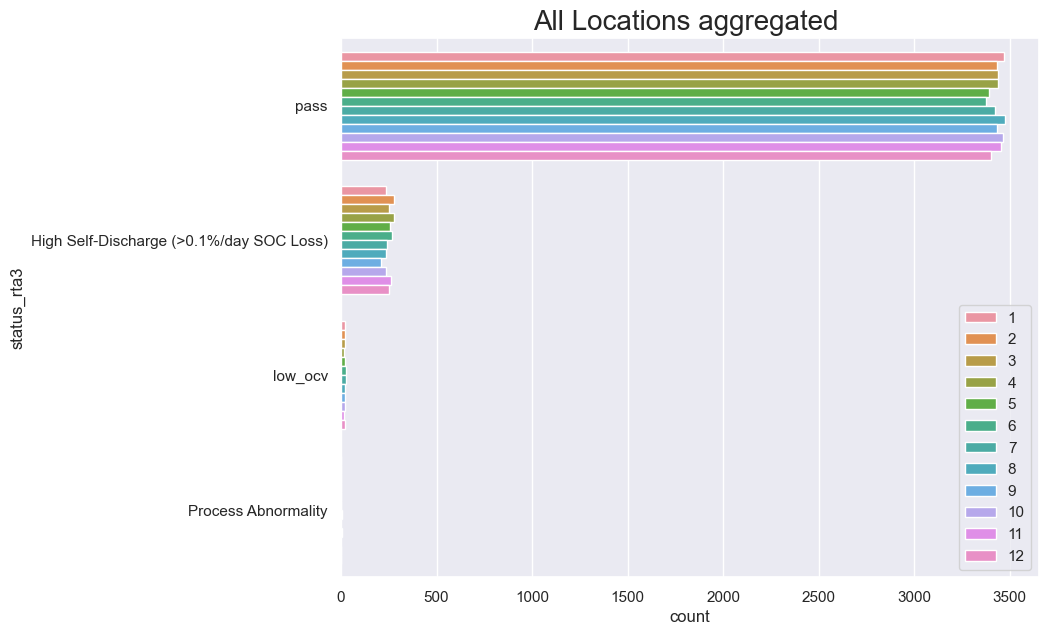

In [437]:
sns.set(rc = {'figure.figsize':(9,7)})
ax = sns.countplot(y="status_rta3", hue="cell_boat_position",data=df_use)
ax.set_title('All Locations aggregated ',fontsize=20)
ax.legend(loc='lower right')

In [410]:
df_use1 = df_use[df_use.status_rta3 == "low_ocv"]

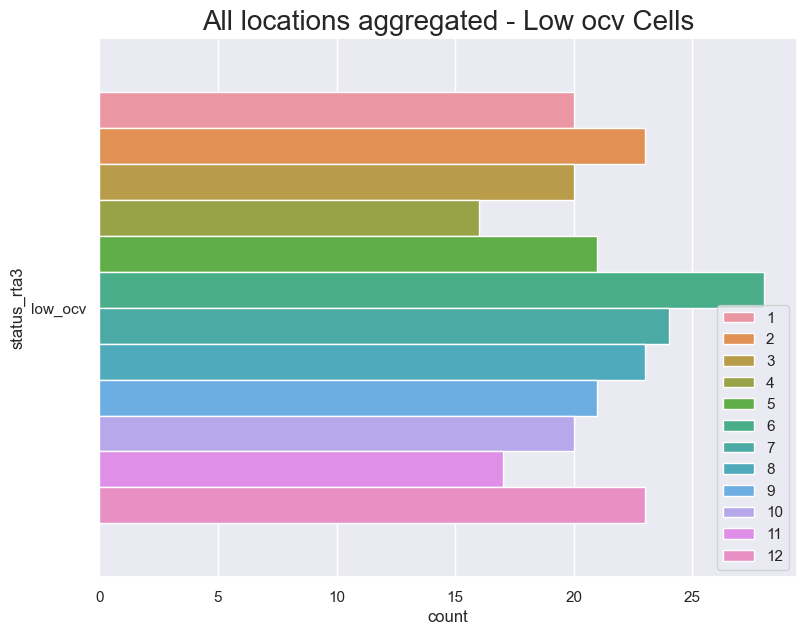

In [438]:
sns.set(rc = {'figure.figsize':(9,7)})
ax = sns.countplot(y="status_rta3", hue="cell_boat_position",data=df_use1)
ax.set_title('All locations aggregated - Low ocv Cells',fontsize=20)
ax.legend(loc='lower right')

In [415]:
df_use.location_name.value_counts()

cm2_49000_04    16204
cm2_49000_03    14352
cm2_49000_02    12014
cm2_49000_01     1902
Name: location_name, dtype: int64

In [416]:
df_loc1 = df_use[df_use.location_name == "cm2_49000_01"]
df_loc2 = df_use[df_use.location_name == "cm2_49000_02"]
df_loc3 = df_use[df_use.location_name == "cm2_49000_03"]
df_loc4 = df_use[df_use.location_name == "cm2_49000_04"]


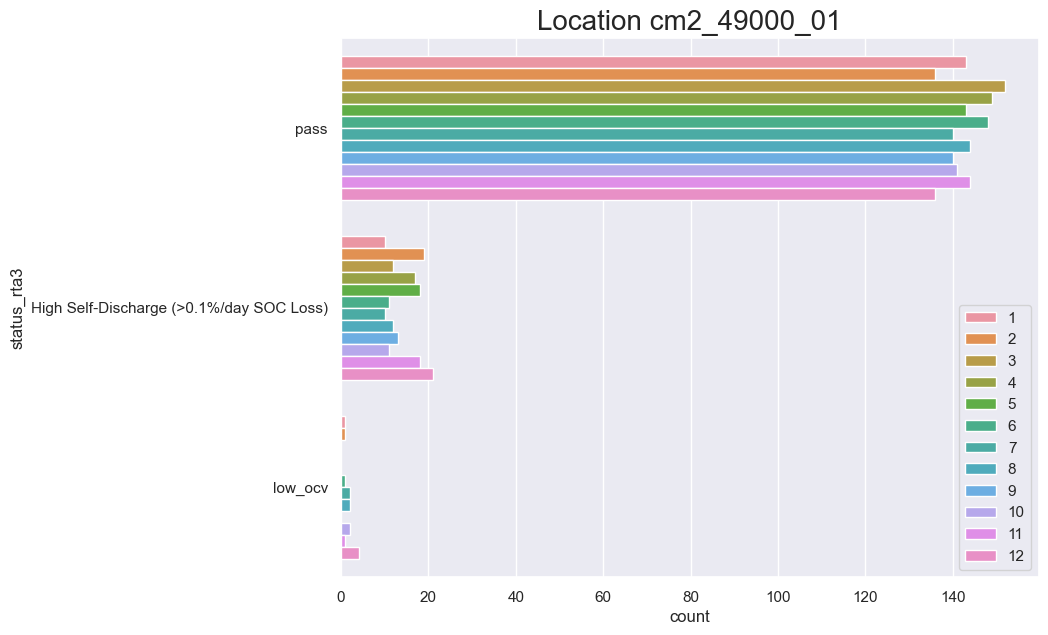

In [436]:
sns.set(rc = {'figure.figsize':(9,7)})
ax = sns.countplot(y="status_rta3", hue="cell_boat_position",data=df_loc1)
ax.set_title('Location cm2_49000_01',fontsize=20)
ax.legend(loc='lower right')

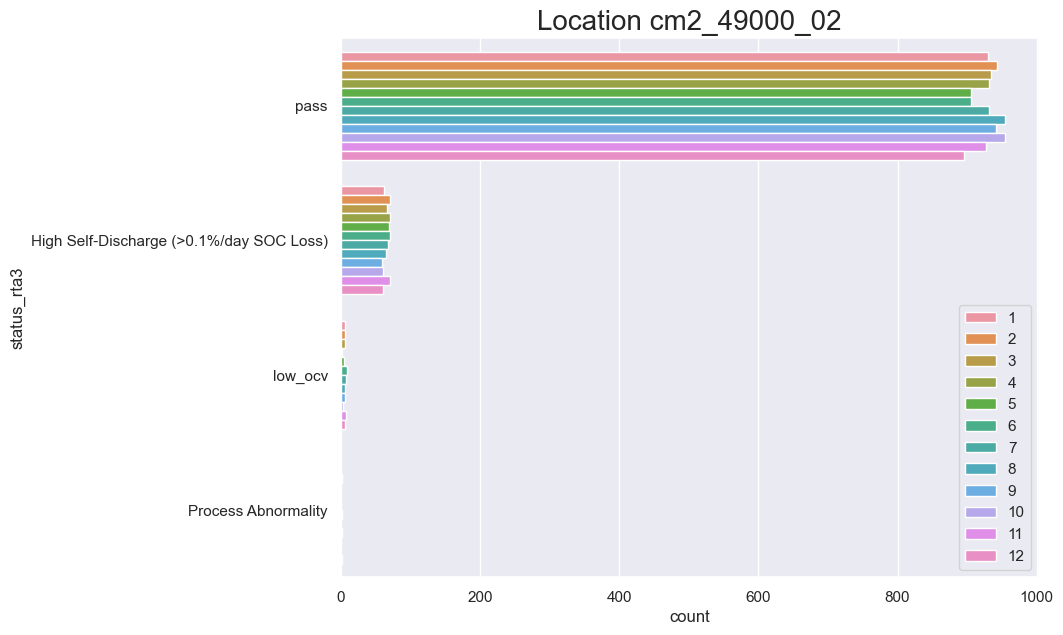

In [435]:
sns.set(rc = {'figure.figsize':(9,7)})
ax = sns.countplot(y="status_rta3", hue="cell_boat_position",data=df_loc2)
ax.set_title('Location cm2_49000_02',fontsize=20)
ax.legend(loc='lower right')

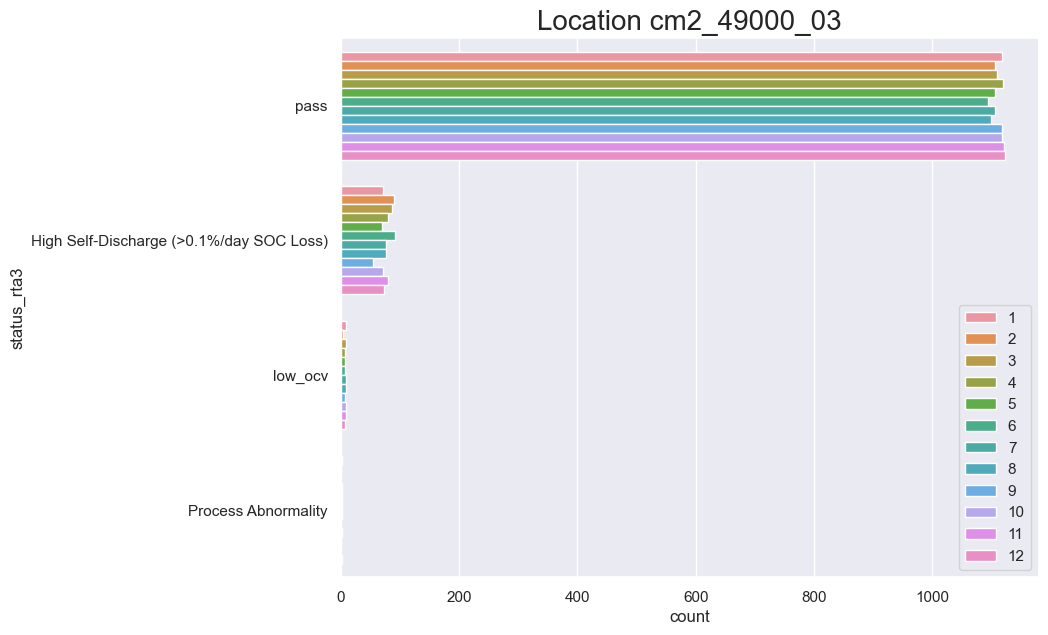

In [434]:
sns.set(rc = {'figure.figsize':(9,7)})
ax = sns.countplot(y="status_rta3", hue="cell_boat_position",data=df_loc3)
ax.set_title('Location cm2_49000_03',fontsize=20)
ax.legend(loc='lower right')

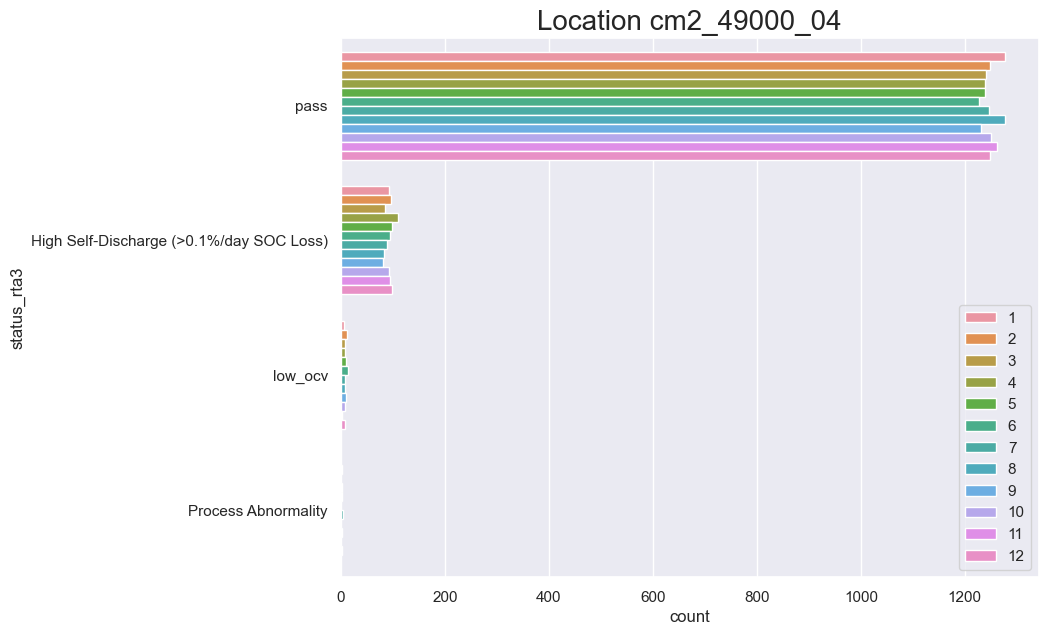

In [433]:
sns.set(rc = {'figure.figsize':(9,7)})
ax = sns.countplot(y="status_rta3", hue="cell_boat_position",data=df_loc4)
ax.set_title('Location cm2_49000_04',fontsize=20)
ax.legend(loc='lower right')

In [413]:
df_pass_new = df_use[df_use.status_rta3 == "pass"]
df_fail_new = df_use[df_use.status_rta3 != "pass"]

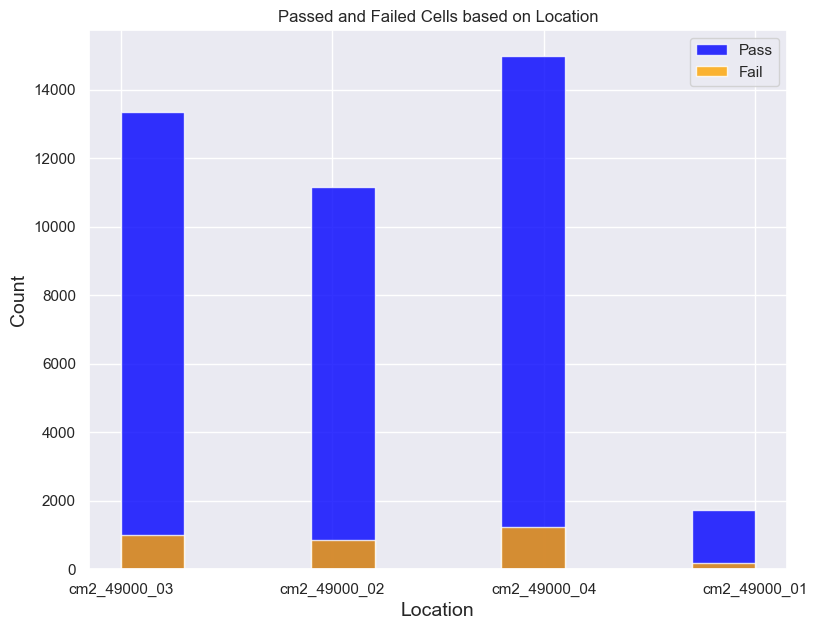

In [414]:
fig, ax = plt.subplots(figsize=(9, 7))
ax.hist(df_pass_new.location_name, bins=10, alpha=0.8, label="Pass", color="blue");
ax.hist(df_fail_new.location_name, bins=10, alpha=0.8, label="Fail", color="orange");
ax.set_title("Passed and Failed Cells based on Location")
ax.set_xlabel("Location", size=14)
ax.set_ylabel("Count", size=14)
ax.legend(loc='upper right')

Text(0.5, 1.0, 'Rest 1 Voltage decay distribution')

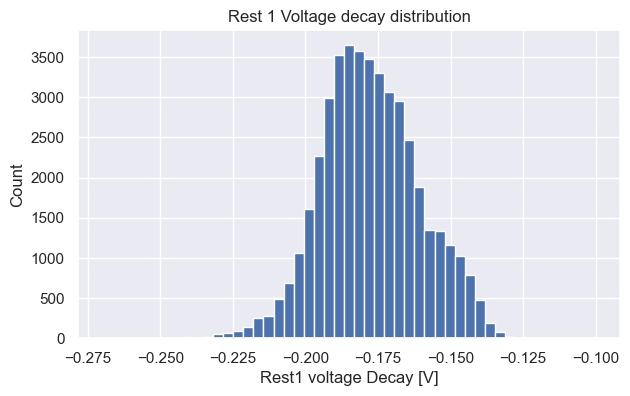

In [450]:
plt.figure(figsize=(7,4))
plt.hist(df_use.rest_1_voltage_decay,bins=np.linspace(-0.27, -0.10, 50));
plt.xlabel("Rest1 voltage Decay [V]")
plt.ylabel("Count")
plt.title("Rest 1 Voltage decay distribution")

In [461]:
df_dsocdt = df_use[(df_use.dsoc_dt_rta3 > -0.001) & (df_use.dsoc_dt_rta3 < 0)]

df_dsocdt = df_dsocdt[(df_dsocdt.rest_1_voltage_decay < 0.3) & (df_dsocdt.rest_1_voltage_decay > -0.5)]

0.2042341801842103
0.04171160035551648


Text(-0.001, -0.1, 'R-squared value: 0.0417')

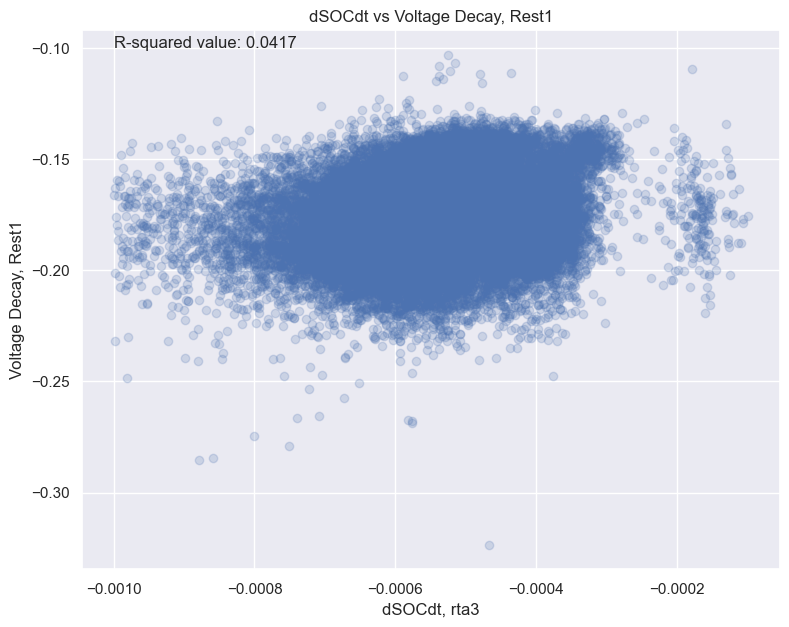

In [470]:
df_dsocdt
result = stats.linregress(df_dsocdt.dsoc_dt_rta3,df_dsocdt.rest_1_voltage_decay)
print(result.rvalue)
print(result.rvalue**2)

plt.scatter(df_dsocdt.dsoc_dt_rta3,df_dsocdt.rest_1_voltage_decay, alpha=0.2)
plt.xlabel("dSOCdt, rta3")
plt.ylabel("Voltage Decay, Rest1")
plt.title("dSOCdt vs Voltage Decay, Rest1")
plt.text(-0.0010, -0.10, 'R-squared value: 0.0417')